In [ ]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import plotly.express as px
!pip install xgboost

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_small.csv to dataset_small.csv


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
dataset = pd.read_csv('dataset_small.csv')
df = pd.DataFrame(dataset)

In [ ]:
dataset.head(10)

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            2               0                  0              0   
1            4               0                  0              2   
2            1               0                  0              1   
3            2               0                  0              3   
4            1               1                  0              4   
5            1               1                  0              4   
6            1               0                  0              3   
7            2               0                  0              0   
8            2               0                  0              2   
9            1               0                  0              1   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   
5                     0              0           0            0   
6                     0              0           0            0   
7                     0              0           0            0   
8                     0              0           0            0   
9                     0              0           0            0   

   qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
0                    0              0              0              0   
1                    0              0              0              0   
2                    0              0              0              0   
3                    0              0              0              0   
4                    0              0              0              0   
5                    0              0              0              0   
6                    0              0              0              0   
7                    0              0              0              0   
8                    0              0              0              0   
9                    0              0              0              0   

   qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
0             0                 0                0               0   
1             0                 0                0               0   
2             0                 0                0               0   
3             0                 0                0               0   
4             0                 0                0               0   
5             0                 0                0               0   
6             0                 0                0               0   
7             0                 0                0               0   
8             0                 0                0               0   
9             0                 0                0               0   

   qty_percent_url  qty_tld_url  length_url  qty_dot_domain  \
0                0            1          14               2   
1                0            1          38               4   
2                0            1          24               1   
3                0            1          38               2   
4                0            1          46               1   
5                0            1          45               1   
6                0            1          32               1   
7                0            1          29               2   
8                0            1          18               2   
9                0            1          11               1   

   qty_hyphen_domain  qty_underline_domain  qty_slash_domain  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   
3            

In [ ]:
dataset.describe()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  58645.000000    58645.000000       58645.000000   58645.000000   
mean       2.284338        0.457123           0.171285       1.937522   
std        1.473209        1.339340           0.801919       2.037525   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       1.000000   
75%        3.000000        0.000000           0.000000       3.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          58645.000000   58645.000000  58645.000000  58645.000000   
mean               0.014102       0.311177      0.033456      0.212959   
std                0.138156       1.159198      0.343272      1.130323   
min                0.000000       0.000000      0.000000      0.000000   
25%                0.000000       0.000000      0.000000      0.000000   
50%                0.000000       0.000000      0.000000      0.000000   
75%                0.000000       0.000000      0.000000      0.000000   
max                9.000000      23.000000     43.000000     26.000000   

       qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
count         58645.000000   58645.000000   58645.000000   58645.000000   
mean              0.004451       0.001535       0.004877       0.003274   
std               0.107352       0.089320       0.096013       0.093381   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000000       0.000000       0.000000       0.000000   
50%               0.000000       0.000000       0.000000       0.000000   
75%               0.000000       0.000000       0.000000       0.000000   
max              10.000000       9.000000       5.000000      11.000000   

       qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
count  58645.000000      58645.000000     58645.000000    58645.000000   
mean       0.004212          0.006855         0.000767        0.002865   
std        0.136331          0.370849         0.075802        0.122604   
min        0.000000          0.000000         0.000000        0.000000   
25%        0.000000          0.000000         0.000000        0.000000   
50%        0.000000          0.000000         0.000000        0.000000   
75%        0.000000          0.000000         0.000000        0.000000   
max       19.000000         60.000000        13.000000       10.000000   

       qty_percent_url   qty_tld_url    length_url  qty_dot_domain  \
count     58645.000000  58645.000000  58645.000000    58645.000000   
mean          0.162503      1.068429     44.959297        1.799540   
std           2.115804      0.305755     54.712657        0.790989   
min           0.000000      0.000000      4.000000        0.000000   
25%           0.000000      1.000000     18.000000        1.000000   
50%           0.000000      1.000000     29.000000        2.000000   
75%           0.000000      1.000000     52.000000        2.000000   
max         174.000000     12.000000   4165.000000       21.000000   

       qty_hyphen_domain  qty_underline_domain  qty_slash_domain  \
count       58645.000000          58645.000000           58645.0   
mean            0.133294              0.000290               0.0   
std             0.465673              0.019802               0.0   
min             0.000000              0.000000               0.0   
25%             0.000000              0.000000               0.0   
50%             0.000000              0.000000               0.0   
75%             0.000000              0.000000               0.0   
max            11.000000              2.000000               0.0   

       qty_questionmark_domain  qty_equal_domain  qty_at_domain  \
count                  58645.

In [ ]:
dataset.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

Total phishing URL 30647
Total legit URL 27998


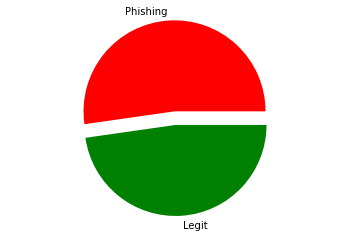

In [ ]:
from matplotlib import style

phishing = (dataset['phishing'] == 1).sum() 

legit = (dataset['phishing'] == 0).sum()
print(f"Total phishing URL",phishing)
print(f"Total legit URL",legit)
p = [phishing, legit]
plt.pie(p,
       labels = ['Phishing', 'Legit'], 
       colors = ['red', 'green'],  
       explode = (0.15, 0),
       startangle = 0) 
plt.axis('equal') 
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(dataset)
var_thres.get_support()
constant_columns = [column for column in dataset.columns
                    if column not in dataset.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
constant_columns

No of columns with 0 variance: 13


['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

In [ ]:
dataset = dataset.drop(constant_columns,axis=1)
dataset.shape

(58645, 99)

In [ ]:
#length of dataset before dropping duplicate rows
lengthbeforedropping=len(dataset)
lengthbeforedropping

58645

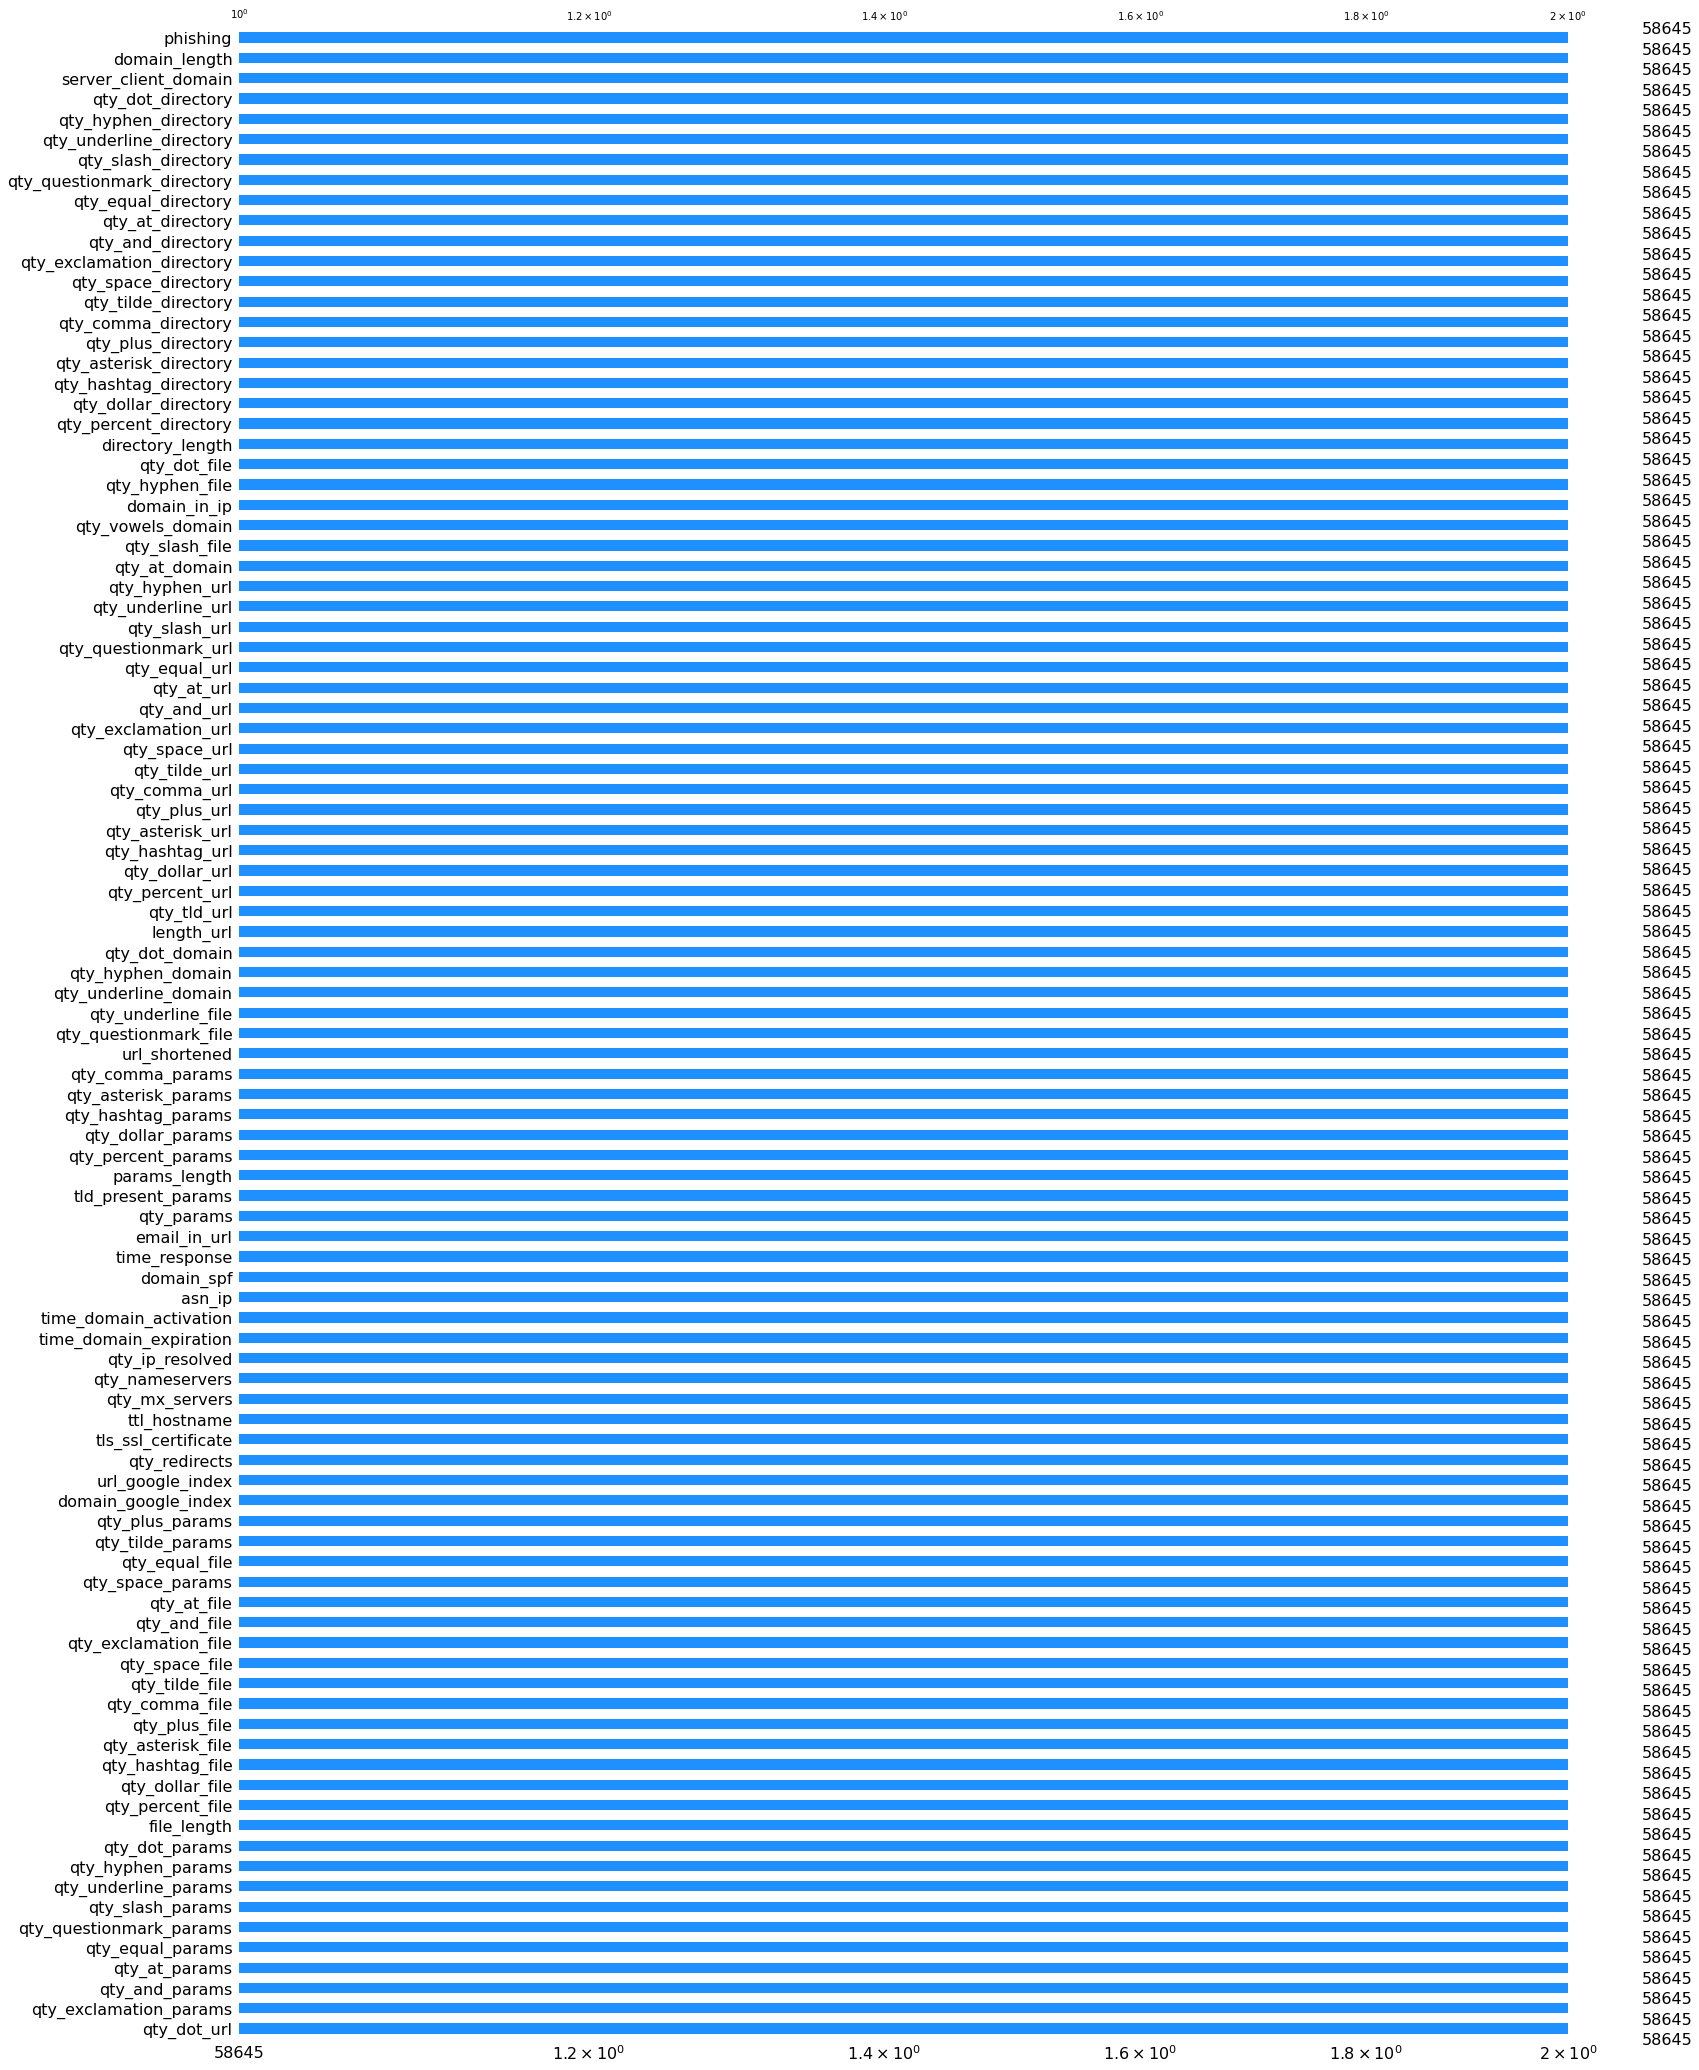

In [ ]:
# plotting count of values per columns ignoring missing values for dataset
msno.bar(dataset,color='dodgerblue', sort='ascending',log=True)

In [ ]:
#length of dataset after dropping duplicate rows

dataset.drop_duplicates(keep=False,inplace=True)
lengthafterdropping=len(dataset)
lengthafterdropping

56992

In [ ]:
#Duplicate Rows
duplicaterows=lengthbeforedropping-lengthafterdropping
duplicaterows

1653

In [ ]:
#Replacing the value -1 with Nan and then deleting those rows

#Finding rows which contain the value -1
dataset.isin(['-1']).count()


qty_dot_url                   56992
qty_hyphen_url                56992
qty_underline_url             56992
qty_slash_url                 56992
qty_questionmark_url          56992
qty_equal_url                 56992
qty_at_url                    56992
qty_and_url                   56992
qty_exclamation_url           56992
qty_space_url                 56992
qty_tilde_url                 56992
qty_comma_url                 56992
qty_plus_url                  56992
qty_asterisk_url              56992
qty_hashtag_url               56992
qty_dollar_url                56992
qty_percent_url               56992
qty_tld_url                   56992
length_url                    56992
qty_dot_domain                56992
qty_hyphen_domain             56992
qty_underline_domain          56992
qty_at_domain                 56992
qty_vowels_domain             56992
domain_length                 56992
domain_in_ip                  56992
server_client_domain          56992
qty_dot_directory           

In [ ]:
#All the rows have the value -1 in atleast one of the columns, so lets remove the rows which have the maximum number of -1

In [ ]:
# Data distribution of the features
cols={} 
for i in dataset.columns:
    print("- - - - - New Column Here- - - - - - - ")
    x=dataset[i].value_counts(normalize=True)
    print(x)
    if dataset[i].isin([-1]).any():
        cols[i]=x[-1] 

Streaming output truncated to the last 5000 lines.
 7723     0.000018
 5317     0.000018
 9864     0.000018
 10905    0.000018
 1458     0.000018
 13851    0.000018
 3991     0.000018
 9232     0.000018
 7546     0.000018
 6002     0.000018
 21326    0.000018
 8280     0.000018
 12436    0.000018
 14013    0.000018
 6876     0.000018
 13315    0.000018
 11810    0.000018
 4829     0.000018
 12222    0.000018
 15396    0.000018
 11689    0.000018
 9002     0.000018
 13990    0.000018
 8796     0.000018
 2154     0.000018
 2693     0.000018
 1404     0.000018
 40000    0.000018
 9064     0.000018
 2817     0.000018
 2156     0.000018
 15898    0.000018
 7680     0.000018
 5241     0.000018
 15493    0.000018
 3420     0.000018
 11189    0.000018
 14750    0.000018
 7217     0.000018
 12626    0.000018
 13698    0.000018
 16296    0.000018
 339      0.000018
 2599     0.000018
 9084     0.000018
 13359    0.000018
 2908     0.000018
 14953    0.000018
 9324     0.000018
 12664    0.000018

###Removing the existing -1's and replacing with NAN in order to replace the values using different imputers.


In [ ]:
for i,j in cols.items():
    if j>=0.8:
        dataset.drop(i,inplace=True,axis=1)

df_imp=dataset.replace(to_replace = -1,value =np.nan)

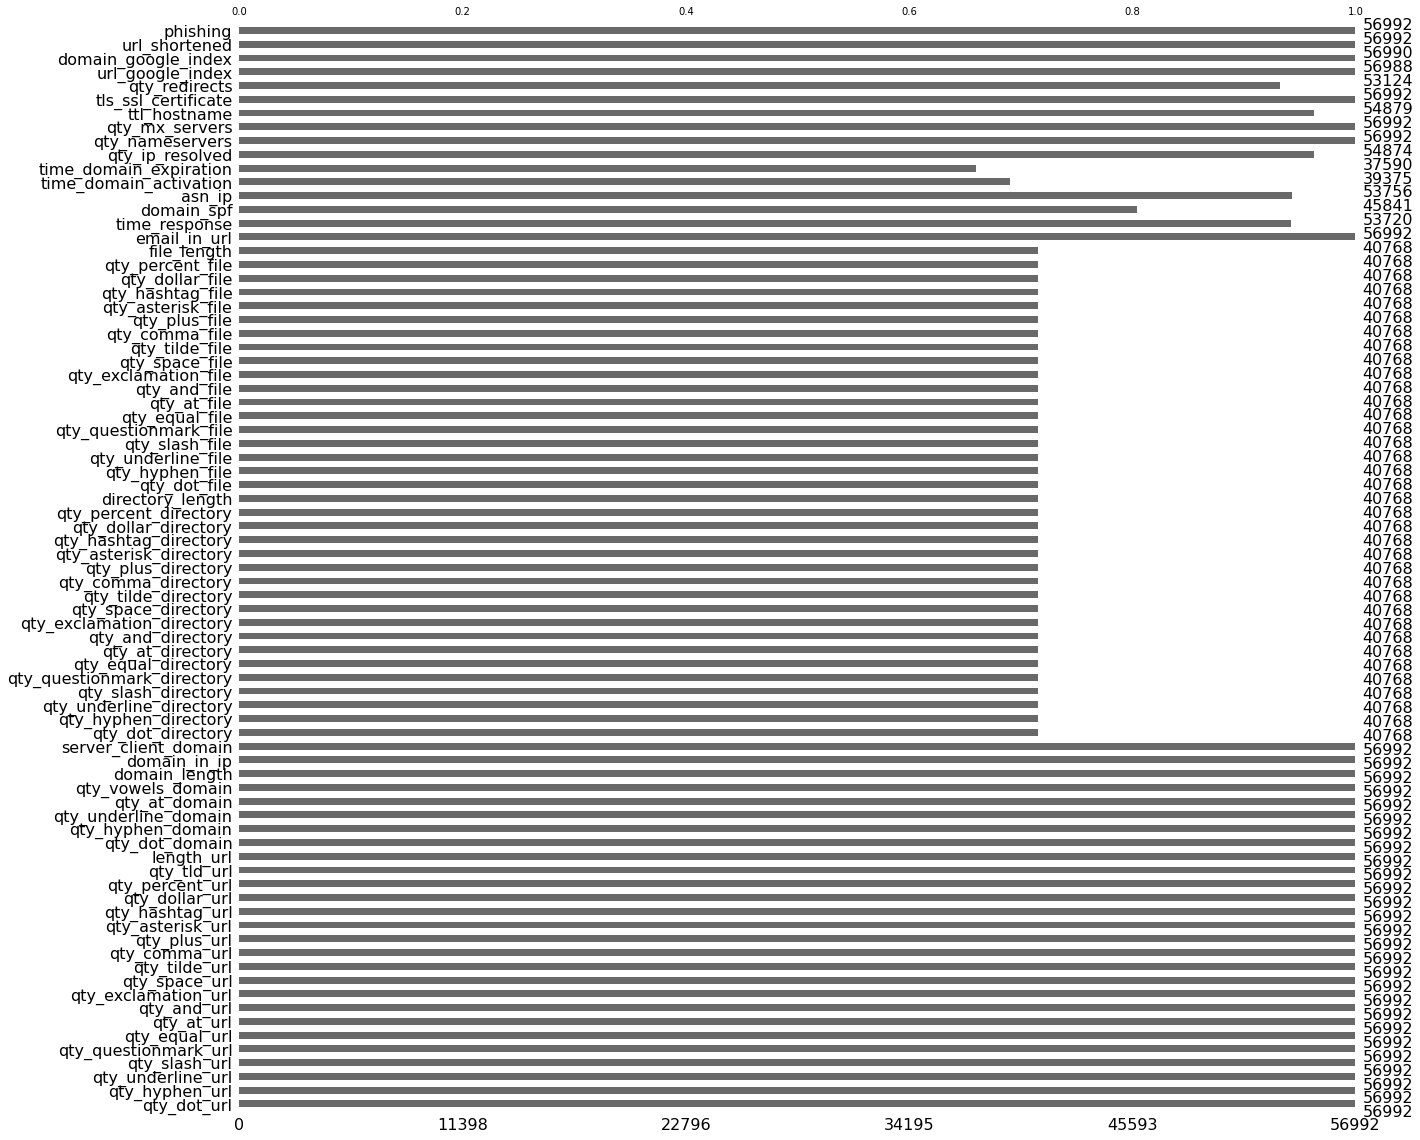

In [ ]:
##Visualization of Missing Data using missingno lib.

msno.bar(df_imp,figsize=(20,20))

### HERE WE HAVE DROPPED ALL THE COLUMNS  WHICH HAVE A PERCENTAGE OF -1'S MORE 80%.


In [ ]:
df_imp

In [ ]:
df_imp.isnull().sum()

qty_dot_url                       0
qty_hyphen_url                    0
qty_underline_url                 0
qty_slash_url                     0
qty_questionmark_url              0
qty_equal_url                     0
qty_at_url                        0
qty_and_url                       0
qty_exclamation_url               0
qty_space_url                     0
qty_tilde_url                     0
qty_comma_url                     0
qty_plus_url                      0
qty_asterisk_url                  0
qty_hashtag_url                   0
qty_dollar_url                    0
qty_percent_url                   0
qty_tld_url                       0
length_url                        0
qty_dot_domain                    0
qty_hyphen_domain                 0
qty_underline_domain              0
qty_at_domain                     0
qty_vowels_domain                 0
domain_length                     0
domain_in_ip                      0
server_client_domain              0
qty_dot_directory           

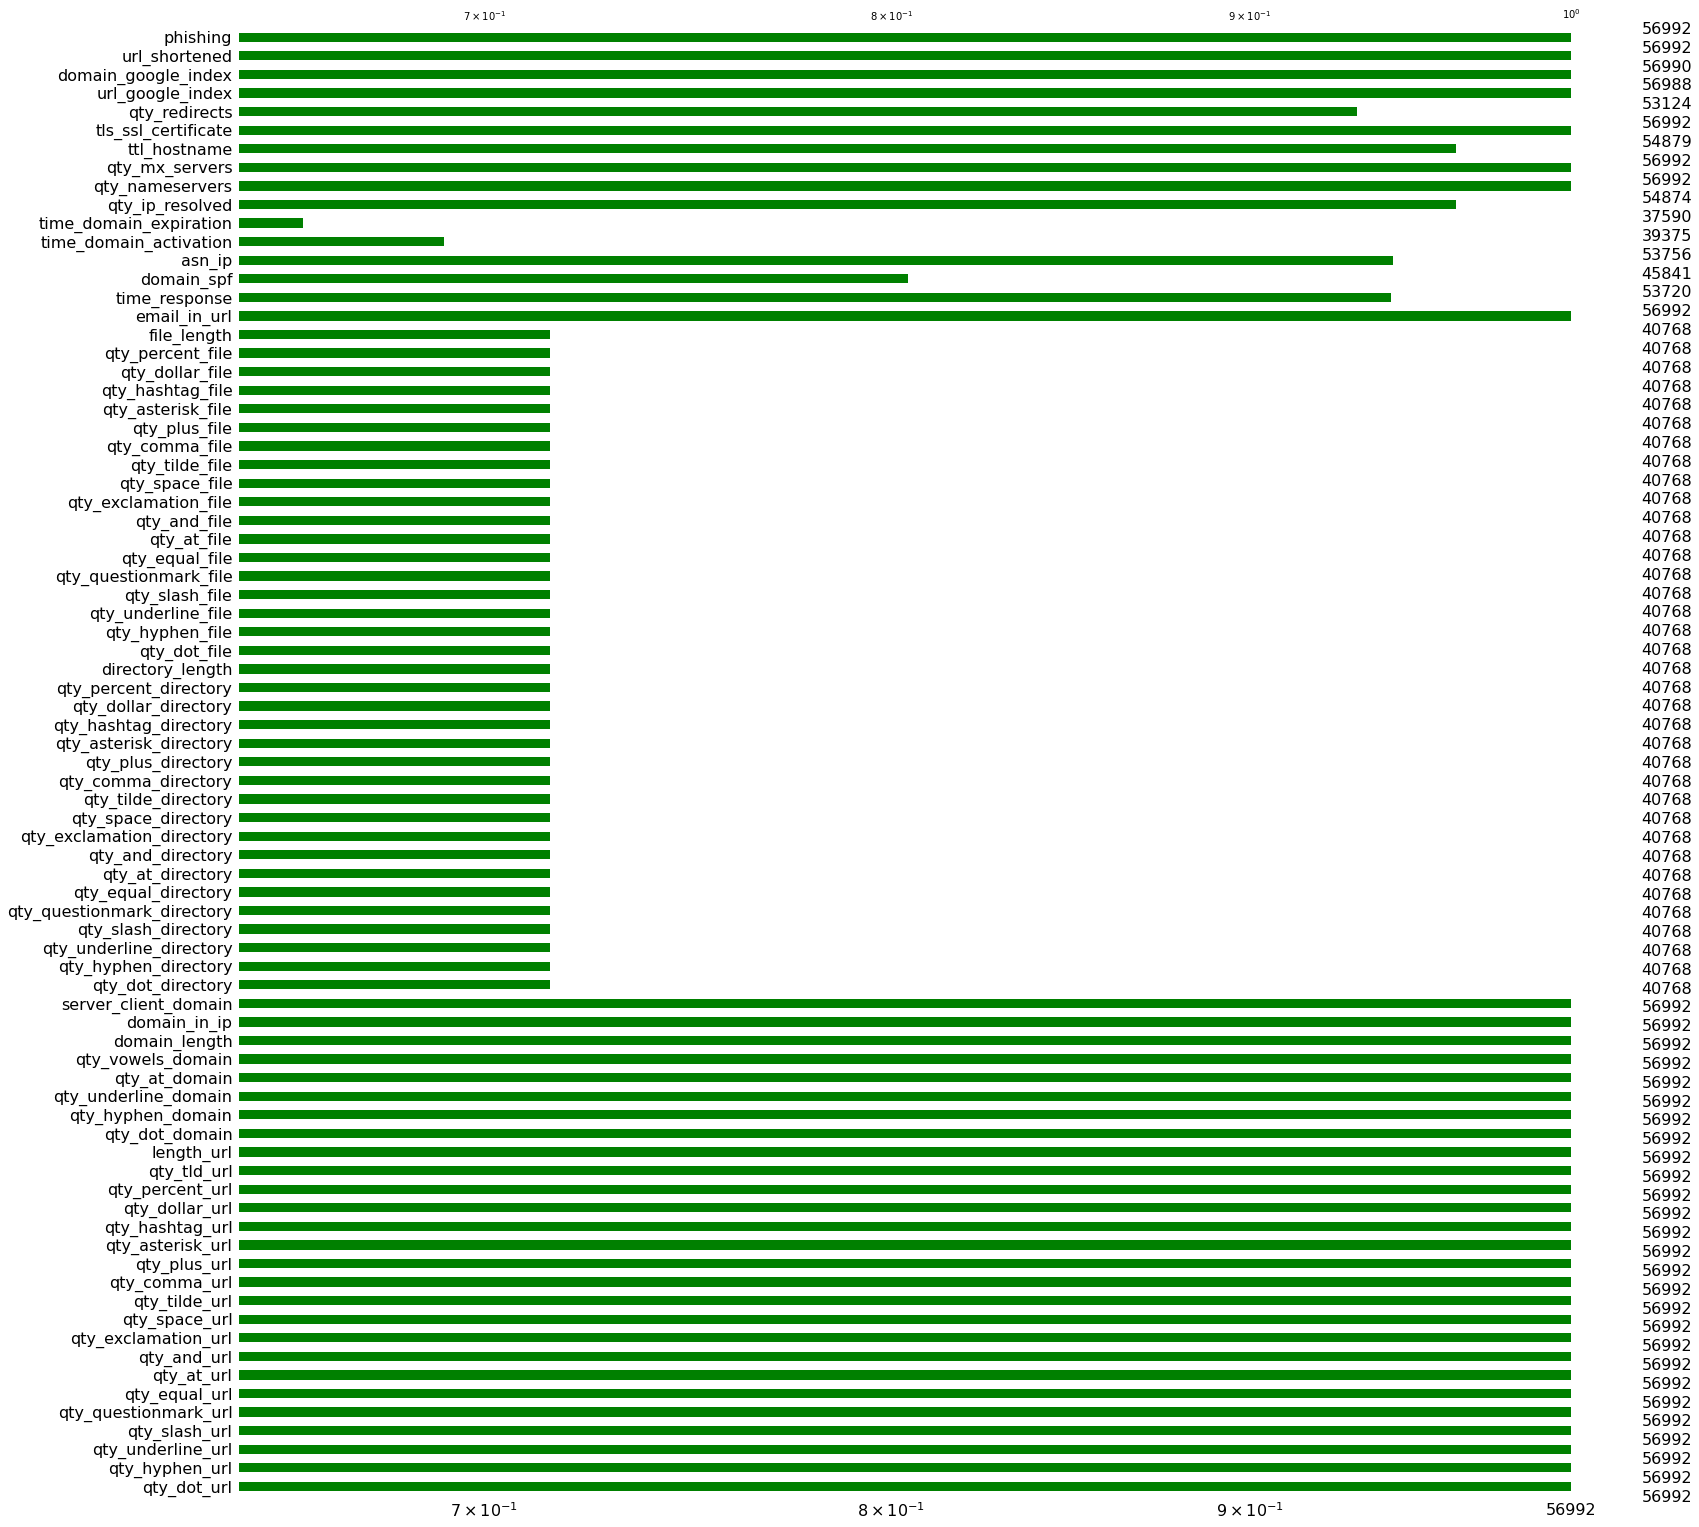

In [ ]:
# visualizing the nullity by column
msno.bar(df_imp, log = True, color = 'g');

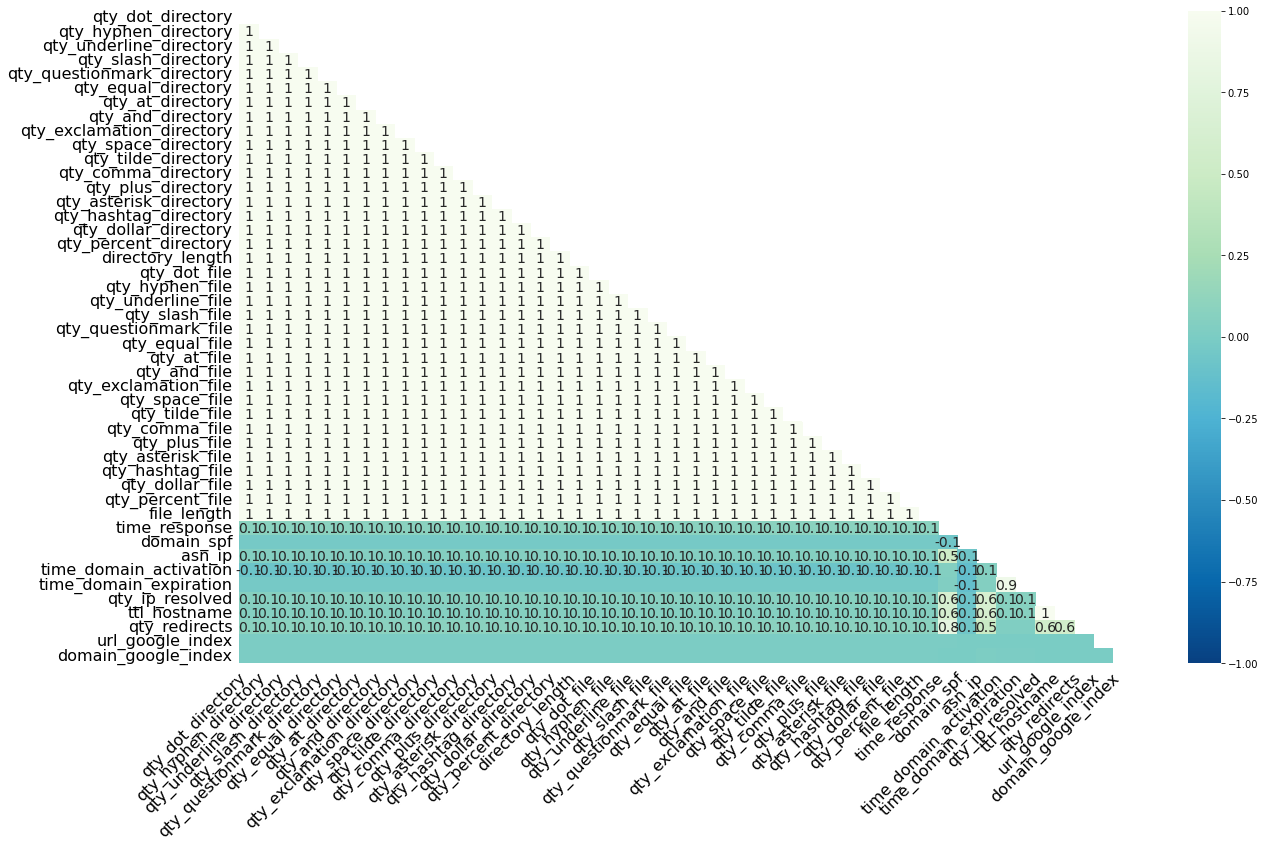

In [ ]:
msno.heatmap(df_imp,  cmap='GnBu_r');

In [ ]:
df_imp.isnull().sum()

qty_dot_url                       0
qty_hyphen_url                    0
qty_underline_url                 0
qty_slash_url                     0
qty_questionmark_url              0
qty_equal_url                     0
qty_at_url                        0
qty_and_url                       0
qty_exclamation_url               0
qty_space_url                     0
qty_tilde_url                     0
qty_comma_url                     0
qty_plus_url                      0
qty_asterisk_url                  0
qty_hashtag_url                   0
qty_dollar_url                    0
qty_percent_url                   0
qty_tld_url                       0
length_url                        0
qty_dot_domain                    0
qty_hyphen_domain                 0
qty_underline_domain              0
qty_at_domain                     0
qty_vowels_domain                 0
domain_length                     0
domain_in_ip                      0
server_client_domain              0
qty_dot_directory           

"""
Having a missing value in a machine learning model is considered very inefficient and hazardous because of the following reasons:
Reduces the efficiency of the ML model.
Affects the overall distribution of data values.
It leads to a biased effect in the estimation of the ML model.
Therefore, Now We impute the data with different imputation techiniques which we later might use it for model training. The different imputation techniques which we can use are Mean, Mode, Median, KNN Imputation.

"""

###Mean Imputation

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imp)
mean_imputed_df = imp_mean.transform(df_imp)
mean_imputed_df = pd.DataFrame(mean_imputed_df,columns = df_imp.columns)
mean_imputed_df.shape

(56992, 79)

In [ ]:
mean_imputed_df.describe()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  56992.000000    56992.000000       56992.000000   56992.000000   
mean       2.292164        0.464416           0.174954       1.971856   
std        1.482672        1.354255           0.810073       2.035510   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       1.000000   
75%        3.000000        0.000000           0.000000       3.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          56992.000000   56992.000000  56992.000000  56992.000000   
mean               0.013721       0.314676      0.034075      0.216136   
std                0.137359       1.169067      0.347697      1.141232   
min                0.000000       0.000000      0.000000      0.000000   
25%                0.000000       0.000000      0.000000      0.000000   
50%                0.000000       0.000000      0.000000      0.000000   
75%                0.000000       0.000000      0.000000      0.000000   
max                9.000000      23.000000     43.000000     26.000000   

       qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
count         56992.000000   56992.000000   56992.000000   56992.000000   
mean              0.004580       0.001579       0.005018       0.001965   
std               0.108895       0.090605       0.097391       0.080114   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000000       0.000000       0.000000       0.000000   
50%               0.000000       0.000000       0.000000       0.000000   
75%               0.000000       0.000000       0.000000       0.000000   
max              10.000000       9.000000       5.000000      11.000000   

       qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
count  56992.000000      56992.000000     56992.000000    56992.000000   
mean       0.004229          0.007054         0.000790        0.002948   
std        0.137914          0.376187         0.076893        0.124368   
min        0.000000          0.000000         0.000000        0.000000   
25%        0.000000          0.000000         0.000000        0.000000   
50%        0.000000          0.000000         0.000000        0.000000   
75%        0.000000          0.000000         0.000000        0.000000   
max       19.000000         60.000000        13.000000       10.000000   

       qty_percent_url   qty_tld_url    length_url  qty_dot_domain  \
count     56992.000000  56992.000000  56992.000000    56992.000000   
mean          0.165532      1.070045     45.355769        1.799270   
std           2.145455      0.308512     54.909963        0.787236   
min           0.000000      0.000000      4.000000        0.000000   
25%           0.000000      1.000000     18.000000        1.000000   
50%           0.000000      1.000000     29.000000        2.000000   
75%           0.000000      1.000000     52.000000        2.000000   
max         174.000000     12.000000   4165.000000       21.000000   

       qty_hyphen_domain  qty_underline_domain  qty_at_domain  \
count       56992.000000          56992.000000   56992.000000   
mean            0.134422              0.000298       0.000018   
std             0.467902              0.020087       0.004189   
min             0.000000              0.000000       0.000000   
25%             0.000000              0.000000       0.000000   
50%             0.000000              0.000000       0.000000   
75%             0.000000              0.000000       0.000000   
max            11.000000              2.000000       1.000000   

       qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  \
count       56992.000000   56992.000000  569

In [ ]:
mean_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slash_directory           0
qty_ques

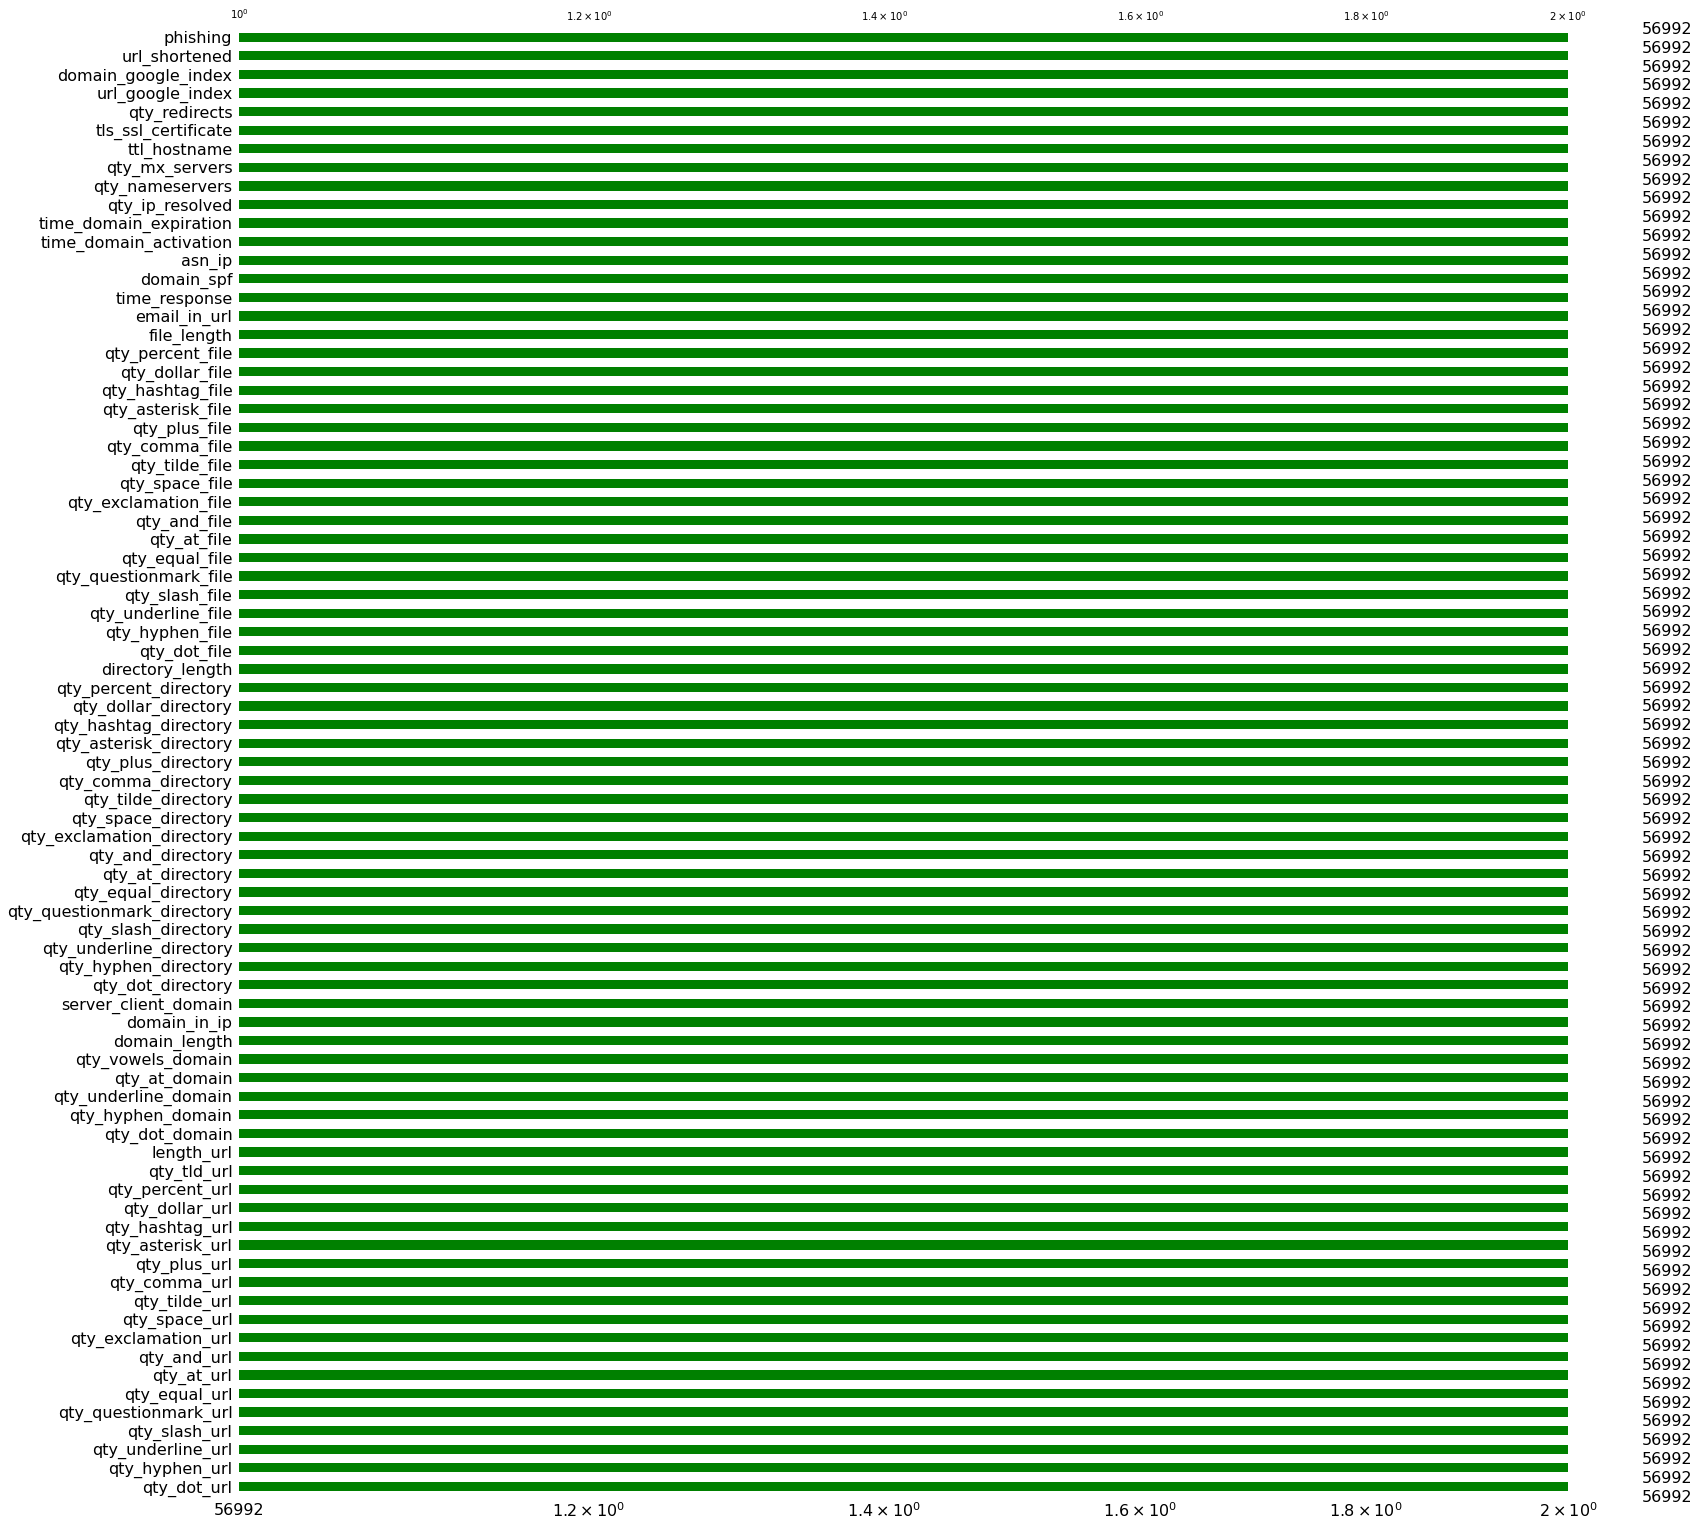

In [ ]:
msno.bar(mean_imputed_df, log = True, color = 'g');

###Mode Imputation

In [ ]:
imp_mode = SimpleImputer( strategy='most_frequent')
imp_mode.fit(df_imp)
mostFreq_imputed_df = imp_mode.transform(df_imp)
mostFreq_imputed_df = pd.DataFrame(mostFreq_imputed_df,columns = df_imp.columns)
mostFreq_imputed_df.shape

(56992, 79)

In [ ]:
mostFreq_imputed_df.describe()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  56992.000000    56992.000000       56992.000000   56992.000000   
mean       2.292164        0.464416           0.174954       1.971856   
std        1.482672        1.354255           0.810073       2.035510   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       1.000000   
75%        3.000000        0.000000           0.000000       3.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          56992.000000   56992.000000  56992.000000  56992.000000   
mean               0.013721       0.314676      0.034075      0.216136   
std                0.137359       1.169067      0.347697      1.141232   
min                0.000000       0.000000      0.000000      0.000000   
25%                0.000000       0.000000      0.000000      0.000000   
50%                0.000000       0.000000      0.000000      0.000000   
75%                0.000000       0.000000      0.000000      0.000000   
max                9.000000      23.000000     43.000000     26.000000   

       qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
count         56992.000000   56992.000000   56992.000000   56992.000000   
mean              0.004580       0.001579       0.005018       0.001965   
std               0.108895       0.090605       0.097391       0.080114   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000000       0.000000       0.000000       0.000000   
50%               0.000000       0.000000       0.000000       0.000000   
75%               0.000000       0.000000       0.000000       0.000000   
max              10.000000       9.000000       5.000000      11.000000   

       qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
count  56992.000000      56992.000000     56992.000000    56992.000000   
mean       0.004229          0.007054         0.000790        0.002948   
std        0.137914          0.376187         0.076893        0.124368   
min        0.000000          0.000000         0.000000        0.000000   
25%        0.000000          0.000000         0.000000        0.000000   
50%        0.000000          0.000000         0.000000        0.000000   
75%        0.000000          0.000000         0.000000        0.000000   
max       19.000000         60.000000        13.000000       10.000000   

       qty_percent_url   qty_tld_url    length_url  qty_dot_domain  \
count     56992.000000  56992.000000  56992.000000    56992.000000   
mean          0.165532      1.070045     45.355769        1.799270   
std           2.145455      0.308512     54.909963        0.787236   
min           0.000000      0.000000      4.000000        0.000000   
25%           0.000000      1.000000     18.000000        1.000000   
50%           0.000000      1.000000     29.000000        2.000000   
75%           0.000000      1.000000     52.000000        2.000000   
max         174.000000     12.000000   4165.000000       21.000000   

       qty_hyphen_domain  qty_underline_domain  qty_at_domain  \
count       56992.000000          56992.000000   56992.000000   
mean            0.134422              0.000298       0.000018   
std             0.467902              0.020087       0.004189   
min             0.000000              0.000000       0.000000   
25%             0.000000              0.000000       0.000000   
50%             0.000000              0.000000       0.000000   
75%             0.000000              0.000000       0.000000   
max            11.000000              2.000000       1.000000   

       qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  \
count       56992.000000   56992.000000  569

In [ ]:
mostFreq_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slash_directory           0
qty_ques

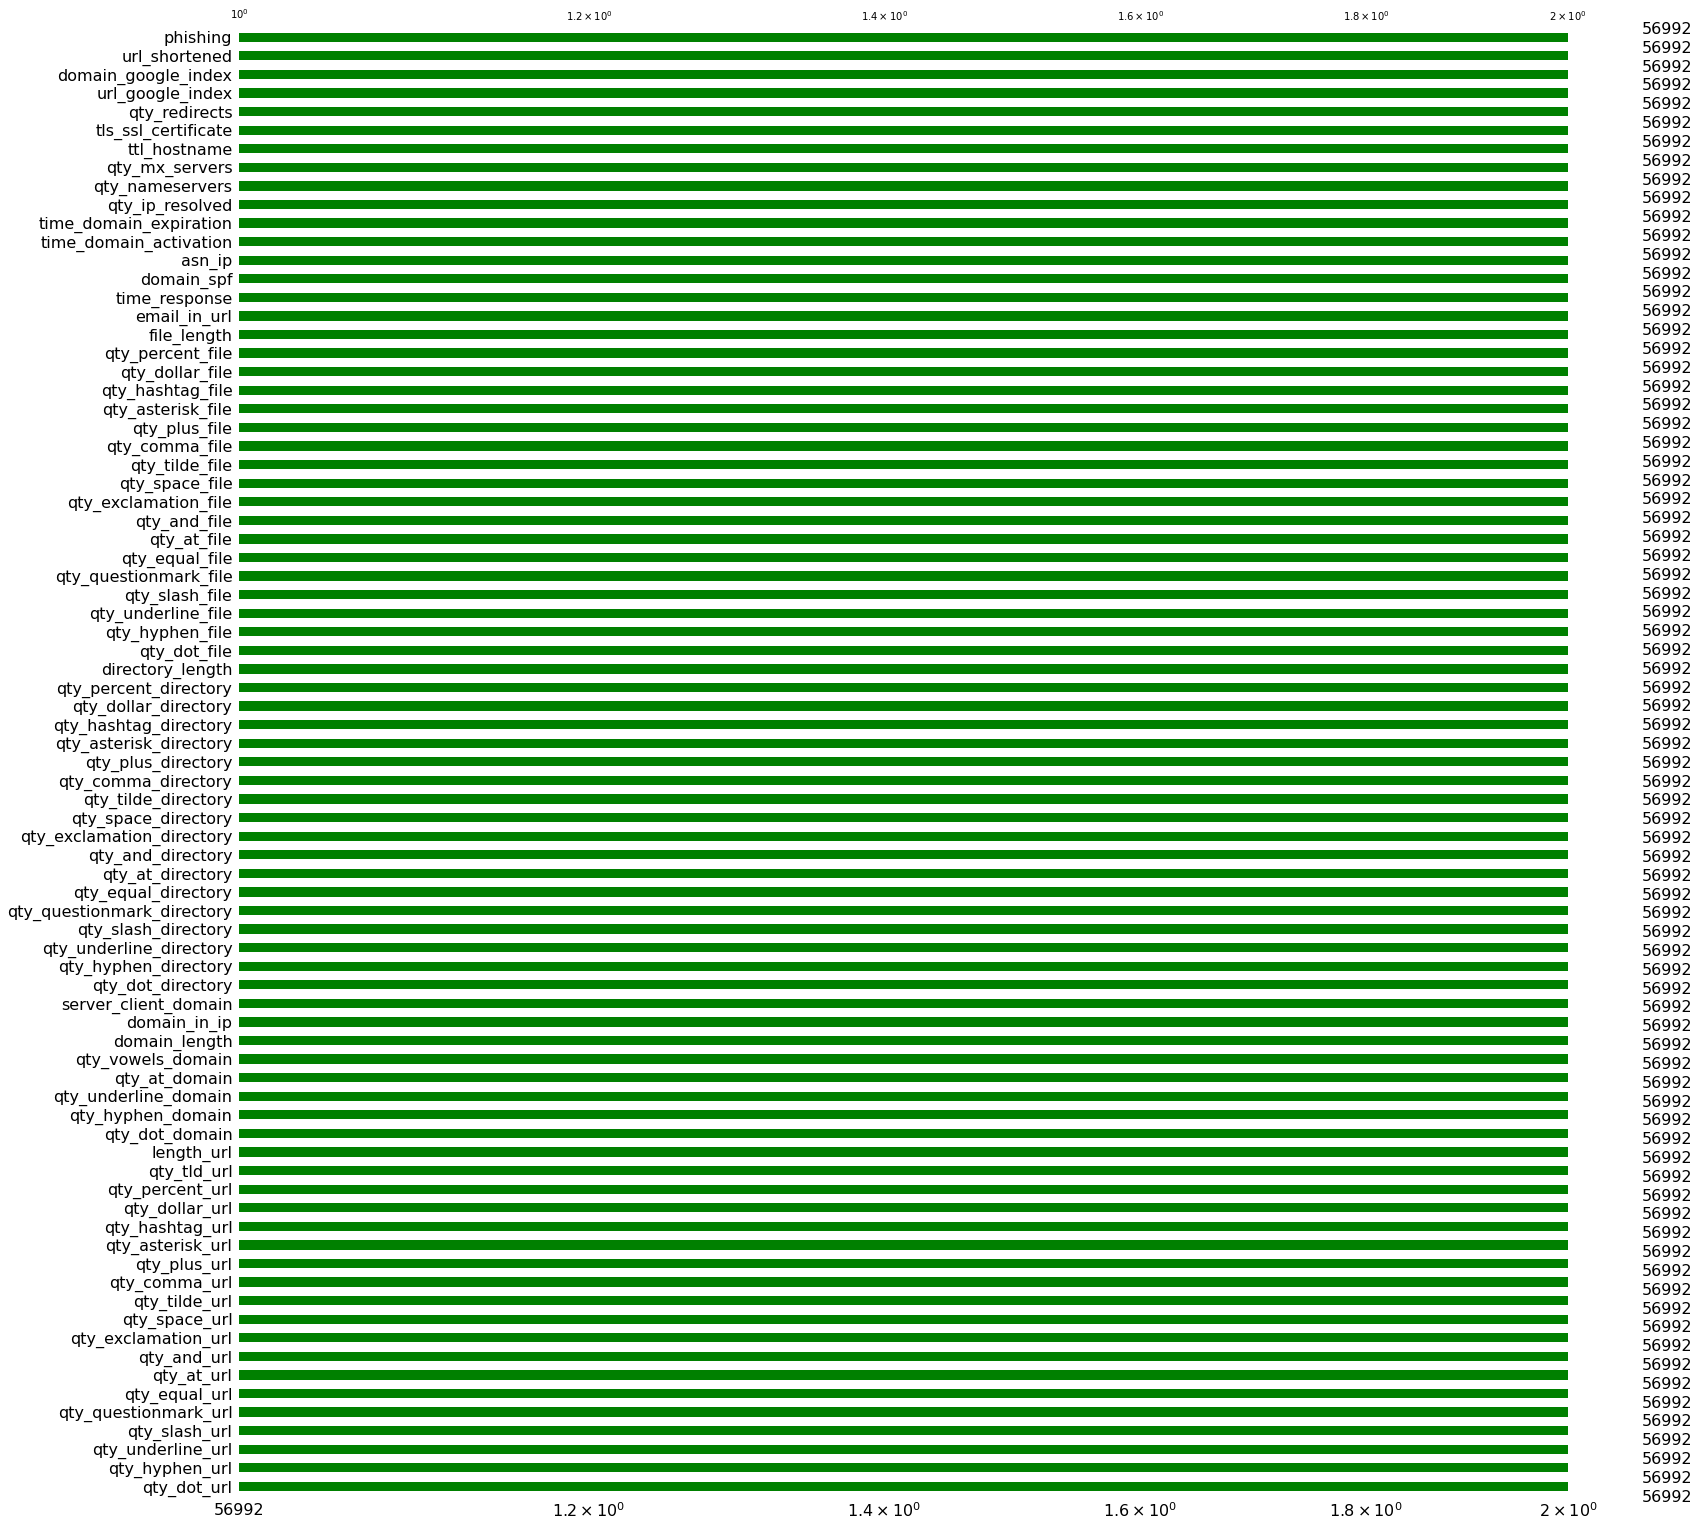

In [ ]:
msno.bar(mostFreq_imputed_df, log = True, color = 'g');

###Median Imputaion

In [ ]:
imp_median = SimpleImputer( strategy='median')
imp_median.fit(df_imp)
median_imputed_df = imp_median.transform(df_imp)
median_imputed_df = pd.DataFrame(median_imputed_df,columns = df_imp.columns)
median_imputed_df.shape

(56992, 79)

In [ ]:
median_imputed_df.describe()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  56992.000000    56992.000000       56992.000000   56992.000000   
mean       2.292164        0.464416           0.174954       1.971856   
std        1.482672        1.354255           0.810073       2.035510   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       1.000000   
75%        3.000000        0.000000           0.000000       3.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          56992.000000   56992.000000  56992.000000  56992.000000   
mean               0.013721       0.314676      0.034075      0.216136   
std                0.137359       1.169067      0.347697      1.141232   
min                0.000000       0.000000      0.000000      0.000000   
25%                0.000000       0.000000      0.000000      0.000000   
50%                0.000000       0.000000      0.000000      0.000000   
75%                0.000000       0.000000      0.000000      0.000000   
max                9.000000      23.000000     43.000000     26.000000   

       qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
count         56992.000000   56992.000000   56992.000000   56992.000000   
mean              0.004580       0.001579       0.005018       0.001965   
std               0.108895       0.090605       0.097391       0.080114   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000000       0.000000       0.000000       0.000000   
50%               0.000000       0.000000       0.000000       0.000000   
75%               0.000000       0.000000       0.000000       0.000000   
max              10.000000       9.000000       5.000000      11.000000   

       qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
count  56992.000000      56992.000000     56992.000000    56992.000000   
mean       0.004229          0.007054         0.000790        0.002948   
std        0.137914          0.376187         0.076893        0.124368   
min        0.000000          0.000000         0.000000        0.000000   
25%        0.000000          0.000000         0.000000        0.000000   
50%        0.000000          0.000000         0.000000        0.000000   
75%        0.000000          0.000000         0.000000        0.000000   
max       19.000000         60.000000        13.000000       10.000000   

       qty_percent_url   qty_tld_url    length_url  qty_dot_domain  \
count     56992.000000  56992.000000  56992.000000    56992.000000   
mean          0.165532      1.070045     45.355769        1.799270   
std           2.145455      0.308512     54.909963        0.787236   
min           0.000000      0.000000      4.000000        0.000000   
25%           0.000000      1.000000     18.000000        1.000000   
50%           0.000000      1.000000     29.000000        2.000000   
75%           0.000000      1.000000     52.000000        2.000000   
max         174.000000     12.000000   4165.000000       21.000000   

       qty_hyphen_domain  qty_underline_domain  qty_at_domain  \
count       56992.000000          56992.000000   56992.000000   
mean            0.134422              0.000298       0.000018   
std             0.467902              0.020087       0.004189   
min             0.000000              0.000000       0.000000   
25%             0.000000              0.000000       0.000000   
50%             0.000000              0.000000       0.000000   
75%             0.000000              0.000000       0.000000   
max            11.000000              2.000000       1.000000   

       qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  \
count       56992.000000   56992.000000  569

In [ ]:
median_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slash_directory           0
qty_ques

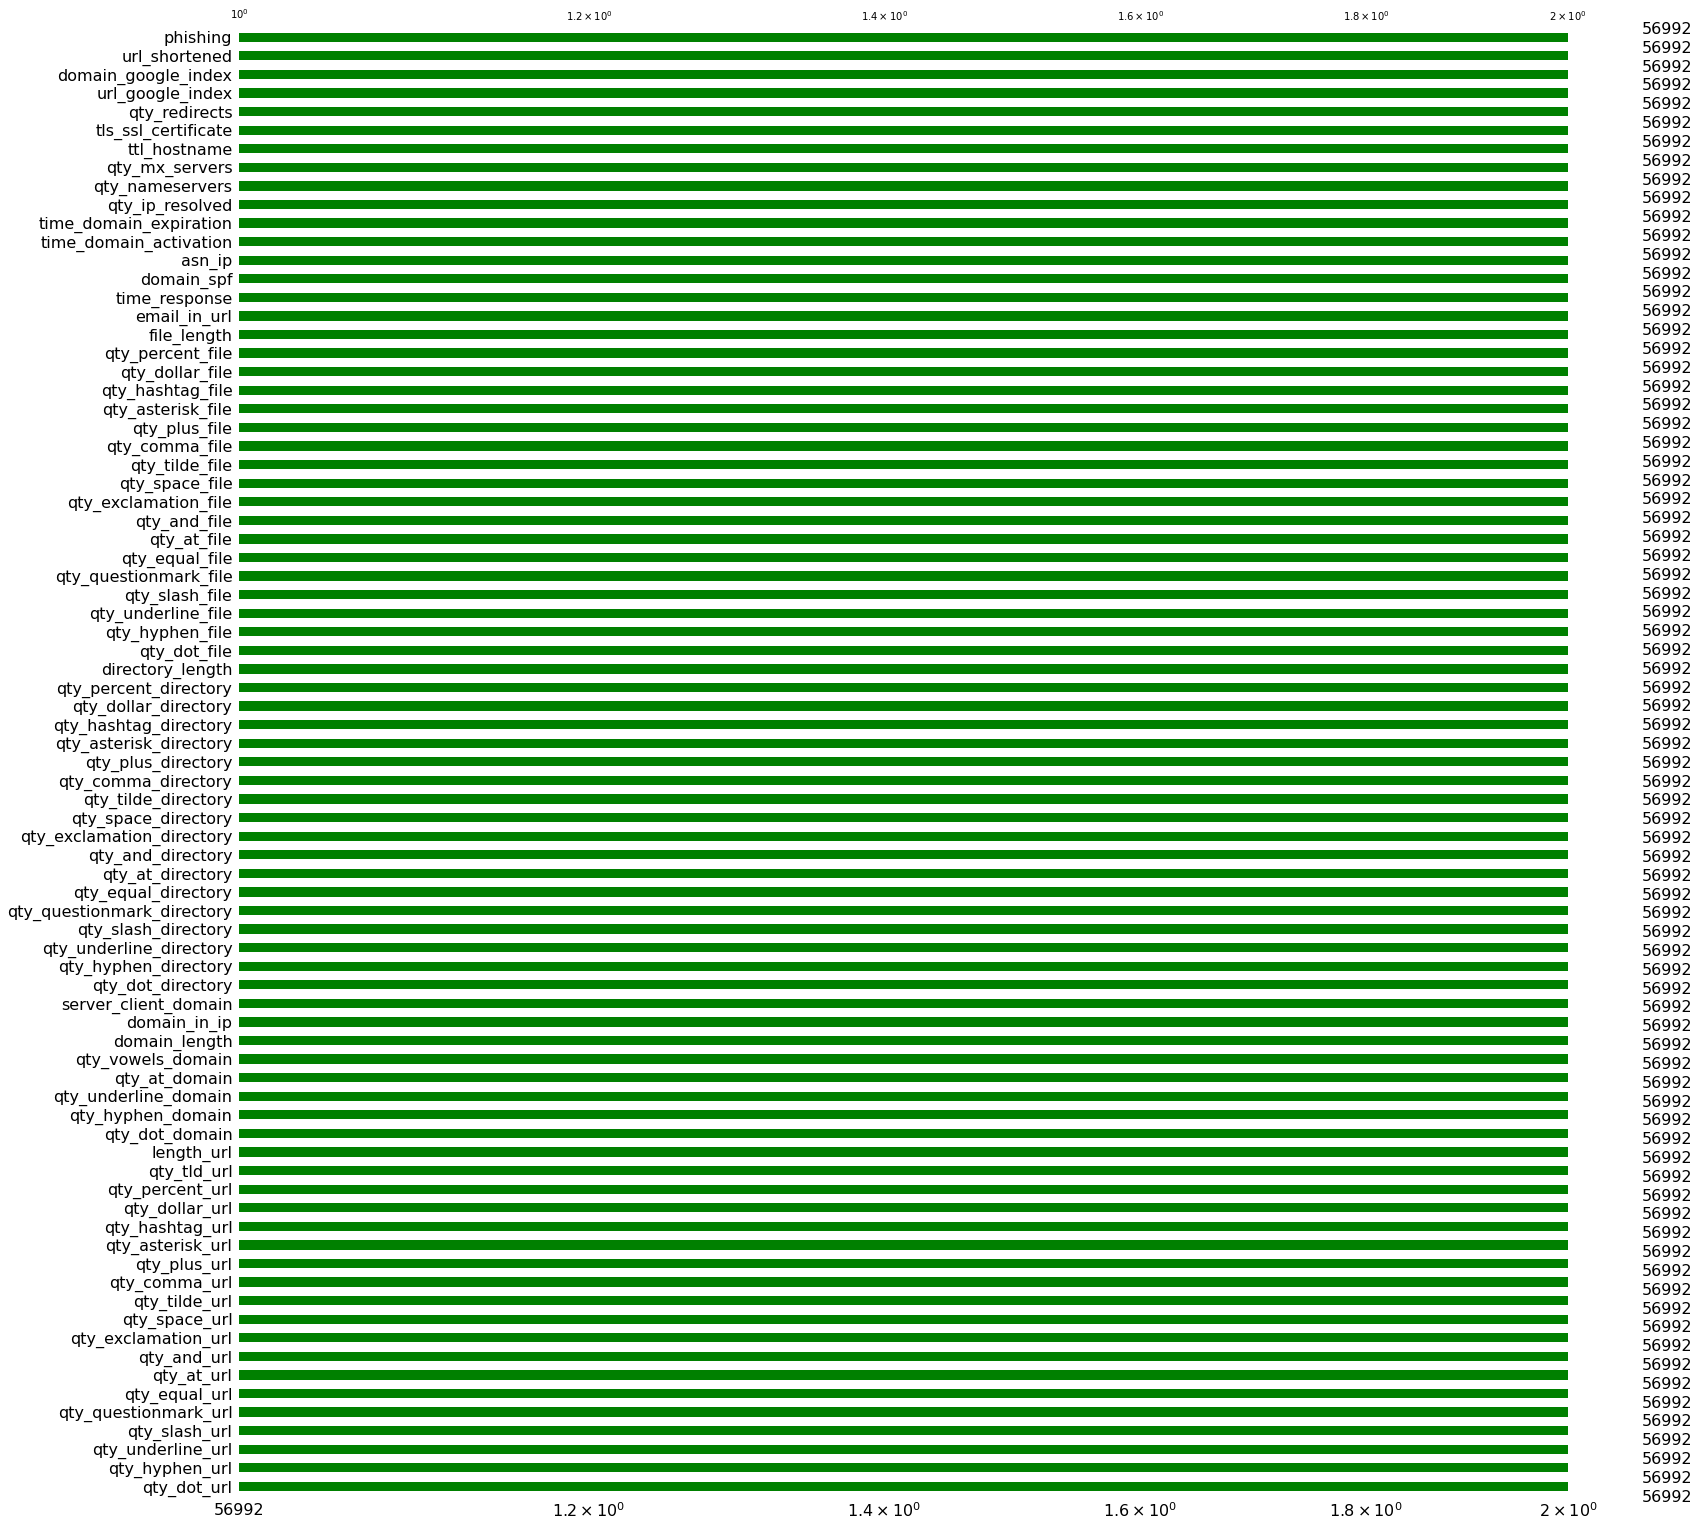

In [ ]:
msno.bar(median_imputed_df, log = True, color = 'g');

###KNN Imputation

In [ ]:
# import sklearn.neighbors._base
# import sys

# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#using KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=7)
knn_imputed_df=r.fit_transform(df_imp)
knn_imputed_df=pd.DataFrame(knn_imputed_df,columns=df_imp.columns)

In [ ]:
knn_imputed_df

In [ ]:
# If any features have low variance, they may not contribute in the model. If any of them exists we try to remove them.

In [ ]:
try:
    from sklearn.feature_selection import VarianceThreshold
except:
    pass  # it will catch any exception here

In [ ]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(knn_imputed_df)
variance_threshold.get_support()
constant_columns = [column for column in knn_imputed_df.columns
                    if column not in knn_imputed_df.columns[variance_threshold.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
print(constant_columns)

knn_imputed_df = knn_imputed_df.drop(constant_columns,axis=1)
knn_imputed_df.shape

No of columns with 0 variance: 6
['qty_questionmark_directory', 'qty_hashtag_directory', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_dollar_file']


(56992, 73)

In [ ]:
# domain_spf feature values should have range:[0,1] but due to imputation, it got values such as  0.333,0.6666, as it takes an average of nearest neighbors values. 
# These values are rounded off to the nearest data instance.
print(knn_imputed_df.domain_spf.value_counts())
knn_imputed_df.domain_spf=knn_imputed_df.domain_spf.apply(lambda x:np.round(x))
print(knn_imputed_df.domain_spf.value_counts())

0.000000    46841
1.000000     9392
0.142857      579
0.285714       93
0.857143       34
0.428571       32
0.571429       11
0.714286       10
Name: domain_spf, dtype: int64
0.0    47545
1.0     9447
Name: domain_spf, dtype: int64


In [ ]:
### Dividing into the numerical columns and categorial columns for better analysis


In [ ]:
num_cols=[]
cat_cols=[]
for i in knn_imputed_df.columns:
    if knn_imputed_df[i].nunique()<=2:
        cat_cols.append(i)
    else:
        num_cols.append(i)
        

cat_cols.remove('qty_at_domain')
num_cols.append('qty_at_domain')

print("categorical columns: \n",cat_cols)
print("******************************")
print("Numerical columns: \n",num_cols) 


categorical columns: 
 ['domain_in_ip', 'server_client_domain', 'email_in_url', 'domain_spf', 'tls_ssl_certificate', 'url_google_index', 'domain_google_index', 'url_shortened', 'phishing']
******************************
Numerical columns: 
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_dire

In [ ]:
knn_imputed_df.to_csv("knn_imputed_dataset.csv",index=False)

In [ ]:
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
        'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory','qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file','qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file','qty_percent_file', 'file_length','phishing']

external_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

In [ ]:
# Plotting all the categorical columns to see how balanced they are

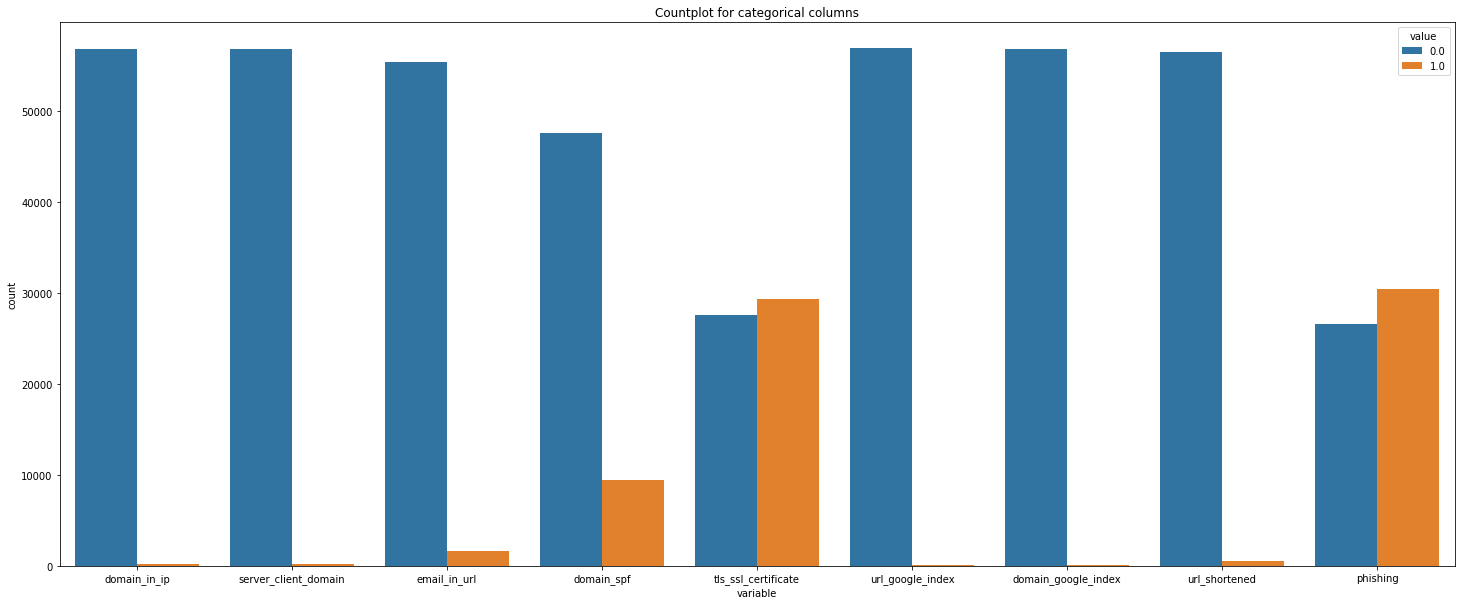

In [ ]:
#countplot for categorical values
plt.figure(figsize=(25,10))
df_categorical = knn_imputed_df.loc[:,cat_cols]
sns.countplot(x='variable',hue='value',data= pd.melt(df_categorical))
plt.title('Countplot for categorical columns')
plt.show()

In [ ]:
df_imp.skew(axis = 0, skipna = True)

qty_dot_url                     4.705857
qty_hyphen_url                  6.748085
qty_underline_url              10.326923
qty_slash_url                   1.608823
qty_questionmark_url           19.537852
qty_equal_url                   5.914453
qty_at_url                     73.861116
qty_and_url                     7.675992
qty_exclamation_url            52.177702
qty_space_url                  78.789030
qty_tilde_url                  29.553968
qty_comma_url                  76.232698
qty_plus_url                   70.996036
qty_asterisk_url               96.466983
qty_hashtag_url               129.999092
qty_dollar_url                 57.013212
qty_percent_url                34.553374
qty_tld_url                     5.170564
length_url                     12.431587
qty_dot_domain                  2.969367
qty_hyphen_domain               5.880011
qty_underline_domain           75.732603
qty_at_domain                 238.729973
qty_vowels_domain               1.716894
domain_length   

In [ ]:
###Analyzing the data now
##i) First on mean imputed data
##ii)then on KNN Imputed Data

In [ ]:
# I) Analysis on Mean Imputed data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X = mean_imputed_df.drop( columns='phishing')
Y = mean_imputed_df['phishing']

In [ ]:
# Spliting the data into training(70%) and test sets(30%)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [ ]:
# Using XGBoost Model on Median imputed data training for feature importance 

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [ ]:
# Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param = {
    # Parameters that will be used
    'max_depth':[int(x) for x in np.linspace(start=5, stop=20, num=1)],
    'min_child_weight':[int(x) for x in np.linspace(start=1, stop=10, num=1)],
    'eta':[0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
    'subsample': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'colsample_bytree': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=50)]
}

xgb_random_search_CV = RandomizedSearchCV(estimator=xgb,
                                      param_distributions = param,
                                      n_iter = 100,
                                      cv=3,
                                      verbose=2,
                                      random_state=47,
                                      n_jobs=2)

xgb_random_search_CV.fit(X_train, y_train)
print(xgb_random_search_CV.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.1, 'n_estimators': 481, 'min_child_weight': 1, 'max_depth': 5, 'eta': 0.3, 'colsample_bytree': 0.1}


**Moving on to feature selection and training the model**

In [ ]:
xgb = XGBClassifier(subsample = 0.1, n_estimators = 500, min_child_weight = 1,  max_depth = 5,  eta = 0.05, colsample_bytree = 0.1)
xgb.fit(X, Y)

XGBClassifier(colsample_bytree=0.1, eta=0.05, max_depth=5, n_estimators=500,
              subsample=0.1)

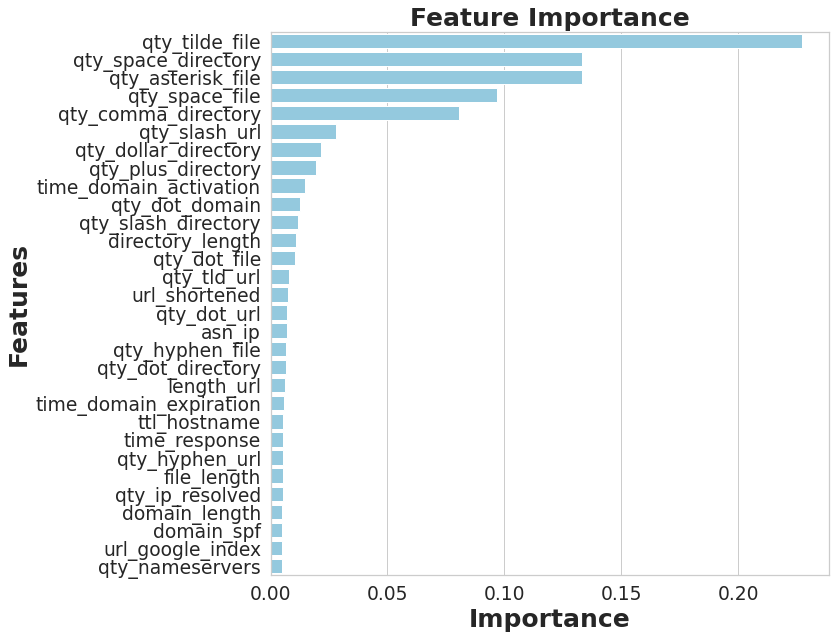

None

In [ ]:
import seaborn as sns
feats = {}
for feature, importance in zip(X.columns, xgb.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False).nlargest(30, 'Importance')
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [ ]:
display(importances)

Features  Importance
0           qty_tilde_file    0.227381
1      qty_space_directory    0.133241
2        qty_asterisk_file    0.133224
3           qty_space_file    0.096755
4      qty_comma_directory    0.080654
5            qty_slash_url    0.027875
6     qty_dollar_directory    0.021467
7       qty_plus_directory    0.019604
8   time_domain_activation    0.014820
9           qty_dot_domain    0.012505
10     qty_slash_directory    0.011790
11        directory_length    0.010880
12            qty_dot_file    0.010384
13             qty_tld_url    0.008043
14           url_shortened    0.007391
15             qty_dot_url    0.007128
16                  asn_ip    0.006916
17         qty_hyphen_file    0.006742
18       qty_dot_directory    0.006465
19              length_url    0.005998
20  time_domain_expiration    0.005720
21            ttl_hostname    0.005209
22           time_response    0.005200
23          qty_hyphen_url    0.005181
24             file_length    0.005180
25         qty_ip_resolved    0.005156
26           domain_length    0.005062
27              domain_spf    0.004926
28        url_google_index    0.004802
29         qty_nameservers    0.004735

Picking Only the Important Features that contribute to getting the result

In [ ]:
imp_features_df = X[['qty_slash_url','qty_dot_file','directory_length','email_in_url','qty_dot_directory',
                     'time_domain_activation','qty_dot_domain','qty_at_url','qty_slash_directory',
                     'qty_questionmark_url','qty_hyphen_directory','file_length','qty_underline_url','qty_tld_url'
                     ,'length_url','url_shortened','qty_dot_url','qty_tilde_directory','qty_equal_directory','ttl_hostname',]]

In [ ]:
imp_features_df.head()

qty_slash_url  qty_dot_file  directory_length  email_in_url  \
0            0.0      0.361092         24.471203           0.0   
1            2.0      0.000000          6.000000           0.0   
2            1.0      0.000000          1.000000           0.0   
3            3.0      0.000000         13.000000           0.0   
4            4.0      0.000000         27.000000           0.0   

   qty_dot_directory  time_domain_activation  qty_dot_domain  qty_at_url  \
0           0.456584             4927.000000             2.0         0.0   
1           0.000000             8217.000000             4.0         0.0   
2           0.000000              258.000000             1.0         0.0   
3           0.000000             2602.000000             2.0         0.0   
4           0.000000             3730.277257             1.0         0.0   

   qty_slash_directory  qty_questionmark_url  qty_hyphen_directory  \
0             2.687892                   0.0              0.377698   
1             2.000000                   0.0              0.000000   
2             1.000000                   0.0              0.000000   
3             3.000000                   0.0              0.000000   
4             4.000000                   0.0              0.000000   

   file_length  qty_underline_url  qty_tld_url  length_url  url_shortened  \
0     7.088525                0.0          1.0        14.0            0.0   
1     0.000000                0.0          1.0        38.0            0.0   
2     0.000000                0.0          1.0        24.0            0.0   
3     0.000000                0.0          1.0        38.0            0.0   
4     0.000000                0.0          1.0        46.0            0.0   

   qty_dot_url  qty_tilde_directory  qty_equal_directory  ttl_hostname  
0          2.0             0.006893             0.015036        3598.0  
1          4.0             0.000000             0.000000        3977.0  
2          1.0             0.000000             0.000000       10788.0  
3          2.0             0.000000             0.000000       14339.0  
4          1.0             0.000000             0.000000         389.0

In [ ]:
frames = [imp_features_df, Y]
ref_df = pd.concat(frames,axis = 1)

# Plotting the Box plot and violin plot to check the outliers

## We can clearly infer that ouliers exists.So, we try to remove in the later steps


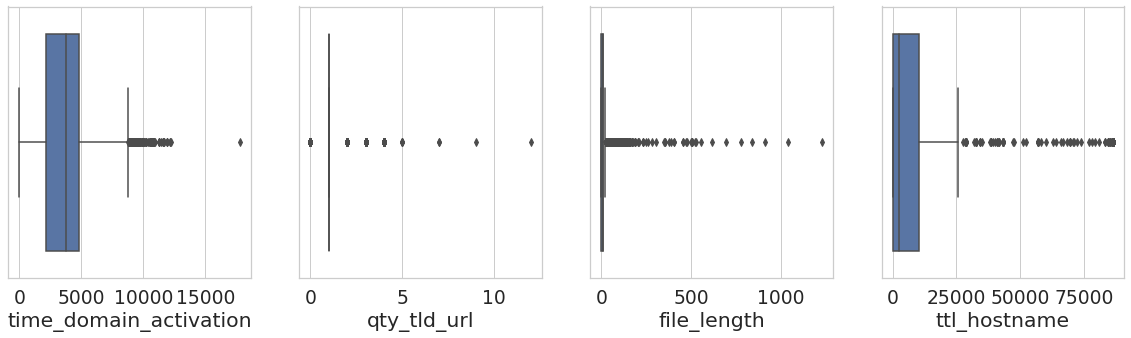

In [ ]:
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(20,5)
sns.boxplot(x=imp_features_df['time_domain_activation'],ax=ax1)
sns.boxplot(x=imp_features_df['qty_tld_url'],ax=ax2)
sns.boxplot(x=imp_features_df['file_length'],ax=ax3)
sns.boxplot(x=imp_features_df['ttl_hostname'],ax=ax4)

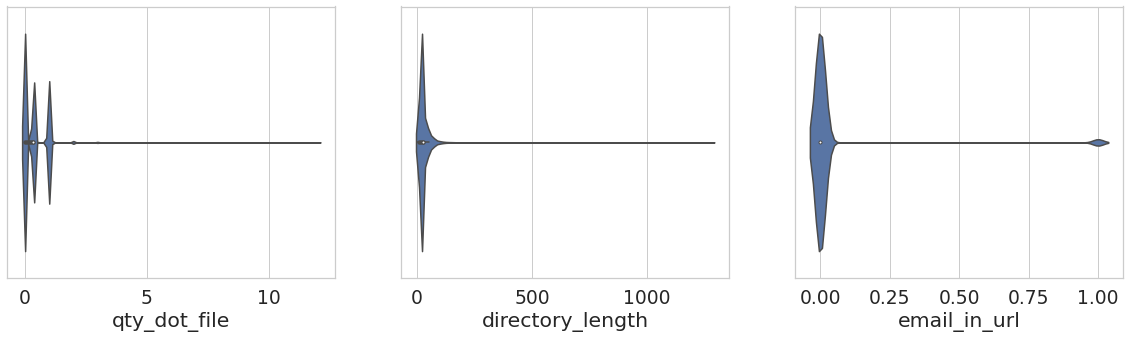

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(20,5)
sns.violinplot(x=imp_features_df['qty_dot_file'],ax=ax1)
sns.violinplot(x=imp_features_df['directory_length'],ax=ax2)
sns.violinplot(x=imp_features_df['email_in_url'],ax=ax3)


In [ ]:
for i in ref_df.columns:
    print(i)
# ref_df['ttl_hostname']

qty_slash_url
qty_dot_file
directory_length
email_in_url
qty_dot_directory
time_domain_activation
qty_dot_domain
qty_at_url
qty_slash_directory
qty_questionmark_url
qty_hyphen_directory
file_length
qty_underline_url
qty_tld_url
length_url
url_shortened
qty_dot_url
qty_tilde_directory
qty_equal_directory
ttl_hostname
phishing


In [ ]:
# We are using the Inter Quartile range to remove all the outliers for important features 
X_temp = imp_features_df.drop({'ttl_hostname','time_domain_activation'},axis=1)
imp_temp = imp_features_df[{'ttl_hostname','time_domain_activation'}]
for i in X_temp.columns:
    a = X_temp[i]
    Q1=a.quantile(0.25)
    Q3=a.quantile(0.75)
    IQR=Q3-Q1
    lowqe_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    print(lowqe_bound,upper_bound)
    percentile25 = X_temp[i].quantile(0.25)
    percentile75 = X_temp[i].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    X_temp[X_temp[i] > upper_limit]
    X_temp[X_temp[i] < lower_limit]

    X_temp = X_temp[X_temp[i] < upper_limit]

-4.5 7.5
-0.5416380494505495 0.9027300824175825
-21.706804356357928 52.178007260596544
0.0 0.0
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


In [ ]:
frames = [X_temp, imp_temp]
imp_features_df = pd.concat(frames,axis = 1)

In [ ]:
imp_features_df.describe()

qty_slash_url  qty_dot_file  directory_length  email_in_url  \
count            0.0           0.0               0.0           0.0   
mean             NaN           NaN               NaN           NaN   
std              NaN           NaN               NaN           NaN   
min              NaN           NaN               NaN           NaN   
25%              NaN           NaN               NaN           NaN   
50%              NaN           NaN               NaN           NaN   
75%              NaN           NaN               NaN           NaN   
max              NaN           NaN               NaN           NaN   

       qty_dot_directory  qty_dot_domain  qty_at_url  qty_slash_directory  \
count                0.0             0.0         0.0                  0.0   
mean                 NaN             NaN         NaN                  NaN   
std                  NaN             NaN         NaN                  NaN   
min                  NaN             NaN         NaN                  NaN   
25%                  NaN             NaN         NaN                  NaN   
50%                  NaN             NaN         NaN                  NaN   
75%                  NaN             NaN         NaN                  NaN   
max                  NaN             NaN         NaN                  NaN   

       qty_questionmark_url  qty_hyphen_directory  file_length  \
count                   0.0                   0.0          0.0   
mean                    NaN                   NaN          NaN   
std                     NaN                   NaN          NaN   
min                     NaN                   NaN          NaN   
25%                     NaN                   NaN          NaN   
50%                     NaN                   NaN          NaN   
75%                     NaN                   NaN          NaN   
max                     NaN                   NaN          NaN   

       qty_underline_url  qty_tld_url  length_url  url_shortened  qty_dot_url  \
count                0.0          0.0         0.0            0.0          0.0   
mean                 NaN          NaN         NaN            NaN          NaN   
std                  NaN          NaN         NaN            NaN          NaN   
min                  NaN          NaN         NaN            NaN          NaN   
25%                  NaN          NaN         NaN            NaN          NaN   
50%                  NaN          NaN         NaN            NaN          NaN   
75%                  NaN          NaN         NaN            NaN          NaN   
max                  NaN          NaN         NaN            NaN          NaN   

       qty_tilde_directory  qty_equal_directory  time_domain_activation  \
count                  0.0                  0.0            56992.000000   
mean                   NaN                  NaN             3730.277257   
std                    NaN                  NaN             2211.438991   
min                    NaN                  NaN                1.000000   
25%                    NaN                  NaN             2171.000000   
50%                    NaN                  NaN             3730.277257   
75%                    NaN                  NaN             4819.000000   
max                    NaN                  NaN            17775.000000   

       ttl_hostname  
count  56992.000000  
mean    5400.749522  
std     7078.351722  
min        0.000000  
25%      292.000000  
50%     2387.500000  
75%    10522.250000  
max    86400.000000

## Below we can clearly see that the outliers has been removed


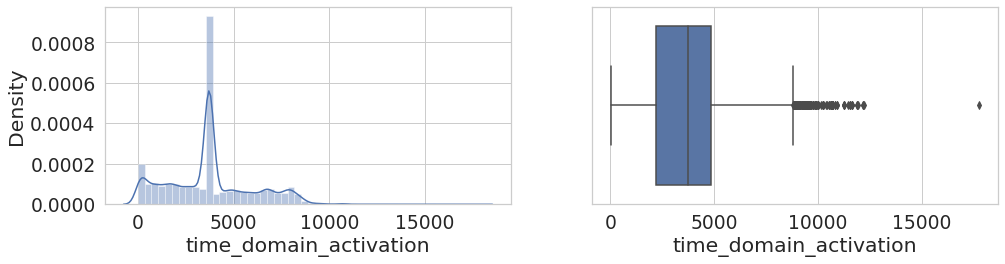

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(imp_features_df['time_domain_activation'])
plt.subplot(2,2,2)
sns.boxplot(imp_features_df['time_domain_activation'])
plt.show()

### Now we will find the correlation between all the features and the target feature.


In [ ]:
ref_df.corr()

qty_slash_url  qty_dot_file  directory_length  \
qty_slash_url                1.000000      0.176589          0.470270   
qty_dot_file                 0.176589      1.000000          0.250982   
directory_length             0.470270      0.250982          1.000000   
email_in_url                 0.164664      0.193426          0.073678   
qty_dot_directory            0.228006      0.731753          0.333881   
time_domain_activation      -0.215807     -0.050806         -0.033237   
qty_dot_domain              -0.176613     -0.036287         -0.045238   
qty_at_url                   0.084038      0.089000          0.118053   
qty_slash_directory          0.744295      0.236725          0.628632   
qty_questionmark_url         0.169069      0.067497          0.045380   
qty_hyphen_directory         0.172342      0.032139          0.410466   
file_length                  0.054014      0.223467          0.654579   
qty_underline_url            0.214323      0.120970          0.223552   
qty_tld_url                  0.236227      0.162924          0.091649   
length_url                   0.518134      0.259796          0.524936   
url_shortened               -0.032748     -0.073076         -0.057413   
qty_dot_url                  0.224192      0.399453          0.154080   
qty_tilde_directory          0.046031      0.003888          0.238419   
qty_equal_directory          0.096669     -0.002553          0.166457   
ttl_hostname                 0.081664      0.107394          0.030199   
phishing                     0.589378      0.188096          0.185565   

                        email_in_url  qty_dot_directory  \
qty_slash_url               0.164664           0.228006   
qty_dot_file                0.193426           0.731753   
directory_length            0.073678           0.333881   
email_in_url                1.000000           0.188341   
qty_dot_directory           0.188341           1.000000   
time_domain_activation     -0.084289          -0.054750   
qty_dot_domain             -0.069092          -0.027176   
qty_at_url                  0.487554           0.089394   
qty_slash_directory         0.133360           0.306097   
qty_questionmark_url        0.159047           0.071677   
qty_hyphen_directory        0.009020           0.064310   
file_length                 0.018643           0.161240   
qty_underline_url           0.072823           0.112293   
qty_tld_url                 0.545102           0.323345   
length_url                  0.232511           0.271285   
url_shortened              -0.014634          -0.062706   
qty_dot_url                 0.336863           0.510154   
qty_tilde_directory        -0.002250           0.037923   
qty_equal_directory         0.008931           0.040909   
ttl_hostname                0.043174           0.087301   
phishing                    0.158796           0.177197   

                        time_domain_activation  qty_dot_domain  qty_at_url  \
qty_slash_url                        -0.215807       -0.176613    0.084038   
qty_dot_file                         -0.050806       -0.036287    0.089000   
directory_length                     -0.033237       -0.045238    0.118053   
email_in_url                         -0.084289       -0.069092    0.487554   
qty_dot_directory                    -0.054750       -0.027176    0.089394   
time_domain_activation                1.000000        0.299864   -0.047557   
qty_dot_domain                        0.299864        1.000000   -0.034820   
qty_at_url                           -0.047557       -0.034820    1.000000   
qty_slash_directory                  -0.075138       -0.088232    0.062436   
qty_questionmark_url                 -0.027457       -0.037326    0.123943   
qty_hyphen_directory                  0.033267        0.003725    0.007668   
file_length                           0.013304        0.000275    0.010708   
qty_underline_url                    -0.043091       -0.022824    0.050538   
qty_tld_url               

### Time Domain Activation has negative correlation with Phishing feature
### Qty Slash Url relatively has a positive correlation with Phishing feature


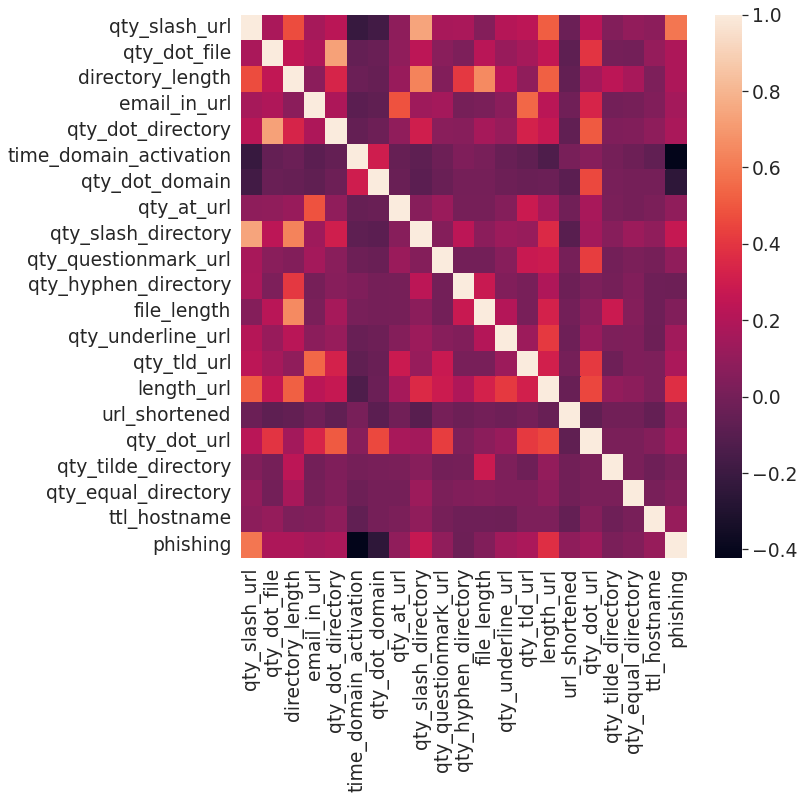

In [ ]:
fig = plt.figure(figsize=(8, 6))
fig.set_size_inches(10,10)
sns.heatmap(ref_df.corr())

## We can clearly infer that if the Domain Activation time is between 3000 to 4000 days, there is high probability of the website being a phishing website.

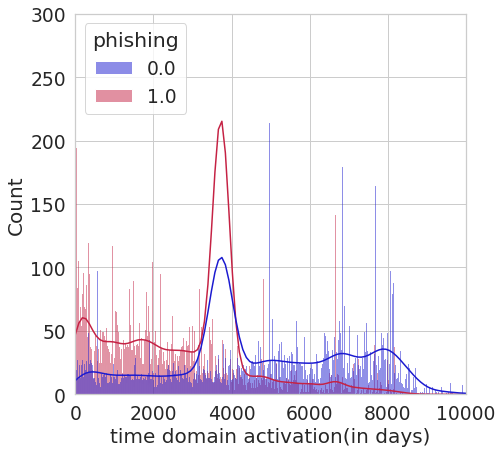

In [ ]:
colors = ["#1B1AD0","#C52244"]
plt.figure(figsize=(7,7))
sns.histplot(data=ref_df, x="time_domain_activation", hue = "phishing",binwidth=10, kde=True, palette=sns.color_palette(colors))
plt.ylim(0,300)
plt.xlim(0, 10000)
plt.xlabel('time domain activation(in days)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

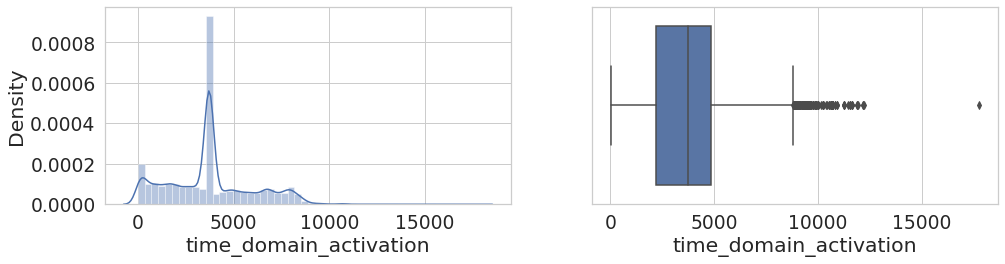

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(ref_df['time_domain_activation'])
plt.subplot(2,2,2)
sns.boxplot(ref_df['time_domain_activation'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_mean_imputed = ref_df
Y_mean_imputed = ref_df['phishing']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_mean_imputed, Y_mean_imputed, test_size=0.3, random_state=0)

In [ ]:
from sklearn import metrics
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train1,y_train1)
    yhat= knn.predict(X_test1)
    mean_acc[i-1] = metrics.accuracy_score(y_test1, yhat)

mean_acc

array([0.86238157, 0.84237923, 0.85898936, 0.84963154, 0.85226342,
       0.84553749, 0.84670722, 0.84156042, 0.84313955, 0.83612118,
       0.83910399, 0.83489297, 0.83588724, 0.83155925, 0.8334893 ,
       0.83109136, 0.83167622, 0.8309159 , 0.83009709, 0.82699731])

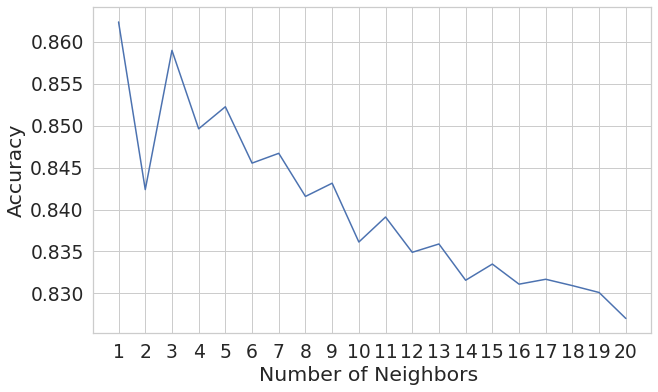

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

We can notice that as the neighbors increases, the accuracy decreases.

In [ ]:
# Training the mean imputed data with KNN-Classifier
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [1,3,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# next we need to fit the model on our trained set
g_res = gs.fit(X_train1, y_train1)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
# find the best score
g_res.best_score_

0.8813856720308818

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [ ]:
## We calculate the accuracy
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9999498671479421
Test set accuracy:  0.8779974265996023


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      7963
         1.0       0.88      0.89      0.89      9135

    accuracy                           0.88     17098
   macro avg       0.88      0.88      0.88     17098
weighted avg       0.88      0.88      0.88     17098



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_mean_imputed, Y_mean_imputed, cv =5)

In [ ]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8966872276839977


The Logistic regression model clearly overfits


In [ ]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1,y_train1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9155761300971154


In [ ]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train1,y_train1)
print("score",logreg2.score(X_test1,y_test1))

score 0.916130541583811


Analysis on KNN Imputed Data

In [ ]:
df_knn=pd.read_csv("knn_imputed_dataset.csv")

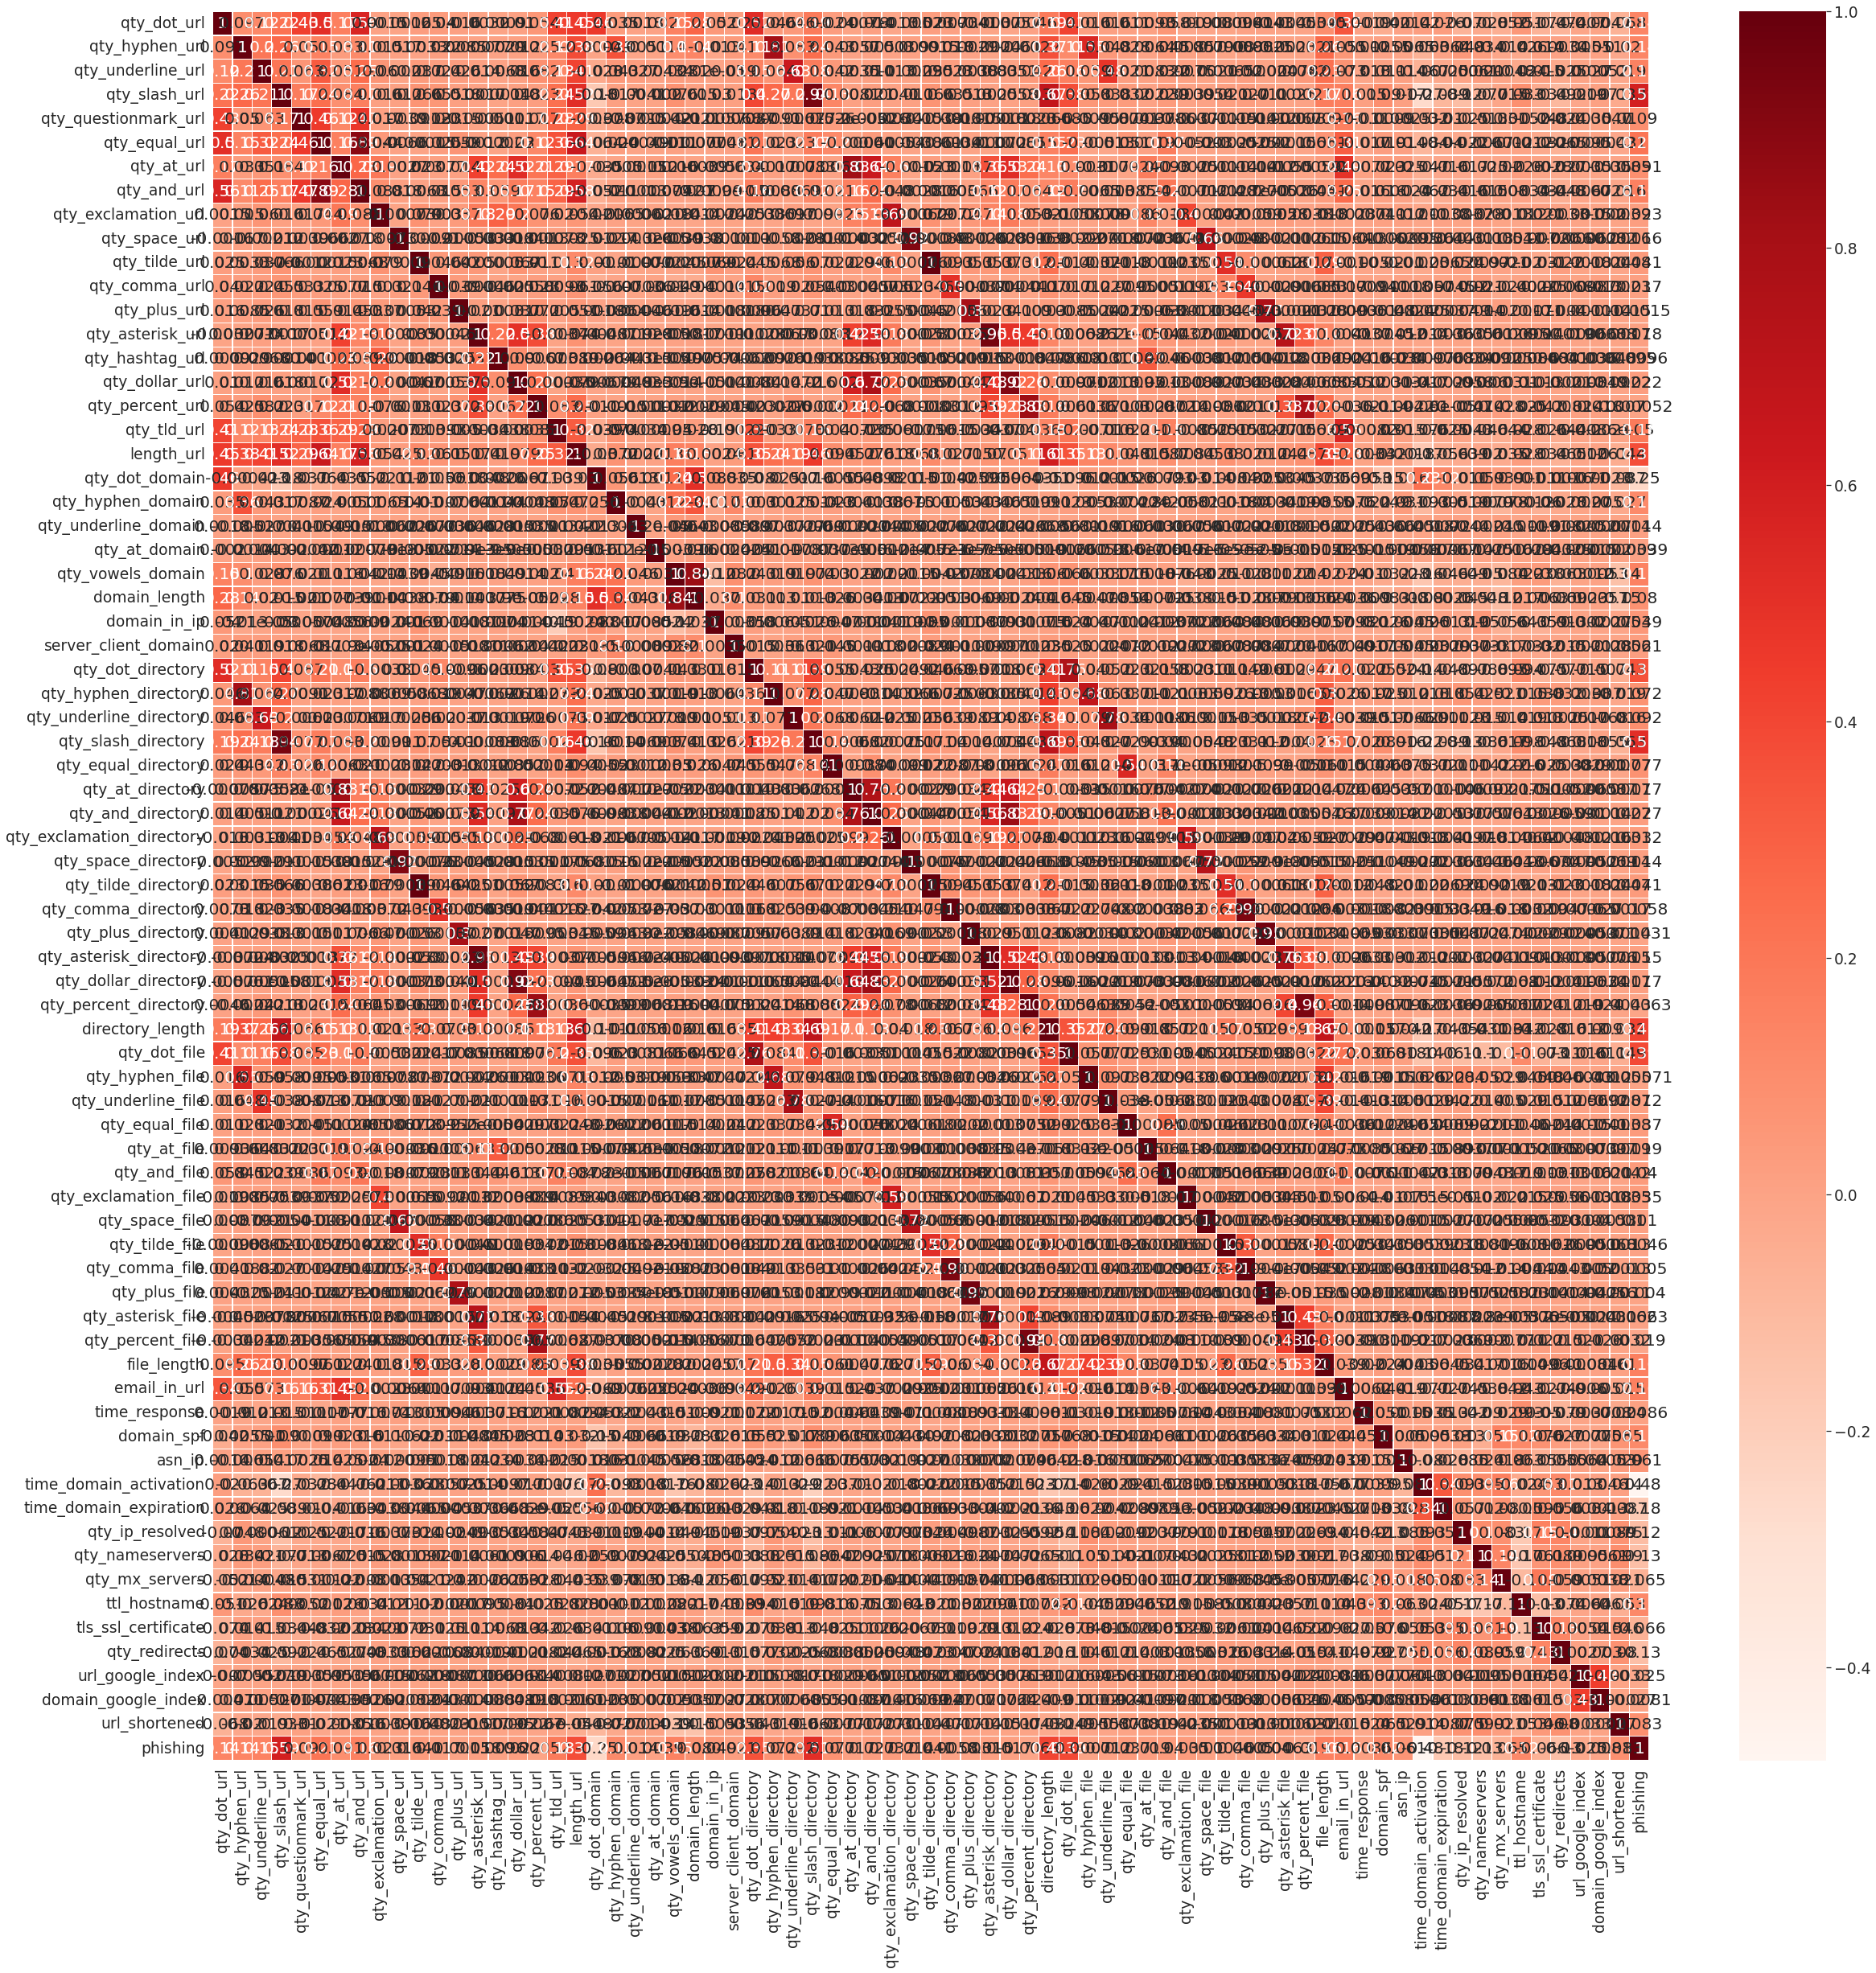

In [ ]:
# Heatmap for knn impurted dataset
plt.figure(figsize=(40,40))
sns.heatmap(df_knn.corr(),annot=True,linewidths="0.3",cmap="Reds")
plt.show()

In [ ]:
# We don’t want highly correlated features in your dataset because they provide the same information 

correlated_features = set()
correlation_matrix = df_knn.drop('phishing', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("most correlated features are :",correlated_features)

most correlated features are : {'qty_dollar_directory', 'qty_and_url', 'qty_slash_directory', 'qty_asterisk_directory', 'qty_plus_file', 'qty_space_directory', 'qty_tilde_directory', 'qty_percent_directory', 'qty_plus_directory', 'qty_comma_file', 'domain_length', 'qty_percent_file', 'qty_hyphen_directory', 'qty_at_directory'}


In [ ]:
X = df_knn.drop('phishing', axis=1)
y = df_knn['phishing']

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [ ]:
from sklearn.feature_selection import RFECV

Optimal number of features: 34


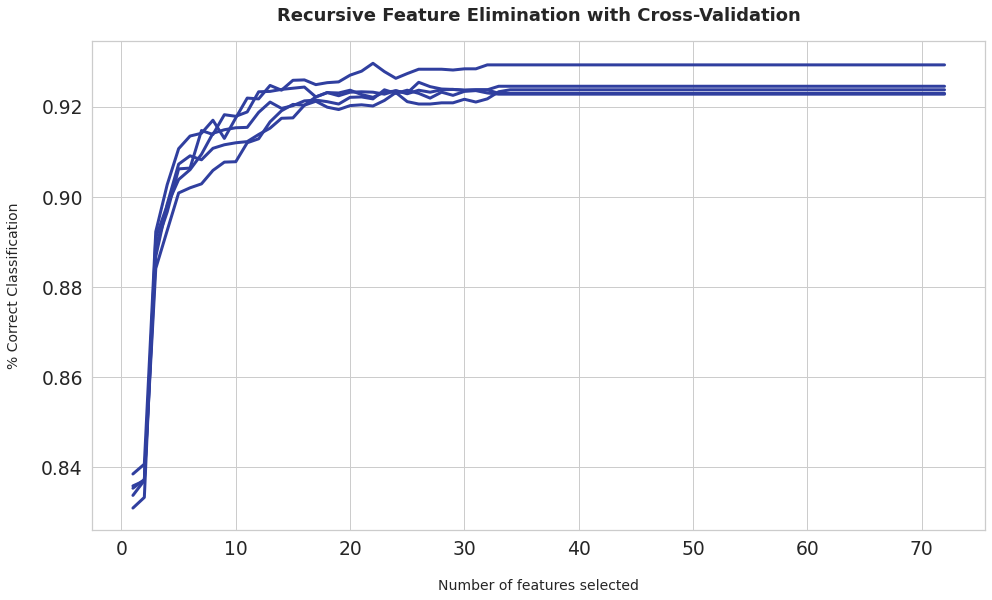

In [ ]:
# Provided with a model that has feature coefficients (e.g. regression)or importance factors (e.g. trees), this algorithm starts from all features and greedily eliminates the least important feature. 
# Once all features are removed, the algorithm returns the subset which gives the best performance.
rfc = XGBClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True), scoring='accuracy',n_jobs=-1)
rfecv.fit(X,y)

print('Optimal number of features: {}'.format(rfecv.n_features_))


plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

We can observe from the above plot as no of selected features increase our accuracy initially increased and then saturated. 
After approximately 30 selected features the accuracy is flattened.

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


AttributeError: ignored

In [ ]:
# optimal no of features:42 is obtained from RFECV method
best_features=dset.head(30).attr.tolist()
print("Top features:",best_features)


In [ ]:
best_features=['directory_length', 'qty_slash_url', 'qty_dot_domain', 'time_domain_activation', 'url_shortened', 'length_url', 'qty_hyphen_directory', 'qty_tld_url', 'qty_ip_resolved', 'qty_hyphen_file', 'qty_nameservers', 'qty_dot_url', 'asn_ip', 'qty_at_url', 'qty_hyphen_domain', 'time_response', 'tls_ssl_certificate', 'qty_underline_file', 'qty_comma_file', 'qty_dot_directory', 'qty_redirects', 'qty_mx_servers', 'domain_length', 'qty_equal_url', 'qty_percent_file', 'qty_plus_url', 'ttl_hostname', 'file_length', 'domain_in_ip', 'domain_spf']

In [ ]:
#finding no of outliers for the selected best features from RFECV
def Outliers(numerical_cols,drop=False):
    for each_feature in numerical_cols:
        feature_data=df_knn[each_feature]
        Q1= np.percentile(feature_data,.25)
        Q3= np.percentile(feature_data,.75)
        IQR =Q3-Q1 #Interquartile Range
        outlier_step=IQR * 1.5
        outliers=feature_data[~((feature_data >= Q1-outlier_step)&(feature_data<=Q3+outlier_step))].index.tolist()
        print('For the feature {}, No of outliers is {}'.format(each_feature,len(outliers)))
Outliers(best_features)

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


In [ ]:
#data normalization using StandardScalar
# standardization can be done only on numerical cols. Applying it on categorical columns gives us undesirable outputs.
ss = StandardScaler()
X_train[numerical_cols] = ss.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = ss.transform(X_test[numerical_cols])
X_train=X_train[best_features]
X_test=X_test[best_features] 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
# Logistic Regression hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid_params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1:lasso; l2:ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid_params,cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),verbose = 2)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
# performance metrics for logistic regression with l2 penality
y_pred=logreg_cv.predict(X_test)
print_metrics(logreg_cv,y_pred)